## Contents

#### 1. Problem Statement (Determining web traffic key indicators and performance metrics)

#### 2. Data

#### 3. Exploratory Data Analysis, cleaning, final data creation and preliminary insights

- There are 117 unique authors, and 1435 Unique Tickers, with 2926 unique post_ids or articles. 
- To aid visualization ease, the only the top 10 categories in the following have been charted. 

#### 4. Visualization Insights (Module 1) 
##### Authors: 
- Overall number of different tickers per author (Top 10 Authors vs Number of Unique Tickers) (Point 1 in Assignment)
- Authors with the most overall pageviews (Top 10 Authors with the most views sum) - "Most popular authors all time" (Point 2 in Assignment)
- Trending Most Popular Top 10 authors - (Top 10 Authors with the most Views new vis.)
- Trending Most Engaging Top 10 authors - (Top 10 Authors with the most Minutes New Vis.)
- Authors with the highest Conversion /Fan Base (Loyal readers) (Top 10 Authors with the most (Views ret. vis./Total Page views)) (Ratio 0.5)
- Most Social Authors (Top 10 Authors with the highest Social Interactions)
- SERP Ranking (Authors) (Top 10 Authors with the Highest Search Refs)
- Topics the top 10 Authors cover (This is determined later using a clustering algorithm on the news articles/Unsupervised Topic Modelling)
- Top 10 Authors (Popularity by Device)

##### Tickers
- Tickers with the most pageviews over time (Top 10 tickers with the most views sum) - "Most popular tickers all time" (Point 3 in Assignment)
- Most engaging tickers (Top 10 tickers with the most Engaged mins sum) "Most engaging tickers all time" (Point 4 in Assignment)
- Trending Most Popular Top 10 Tickers - (Top 10 Tickers with the most Views new vis.)
- Trending Most Engaging Top 10 Tickers - (Top 10 Tickers with the most Minutes New Vis.)
- Tickers with the highest Conversion /Fan Base (Loyal readers) (Top 10 Tickers with the most (Views ret. vis./Total Page views)) (Ratio 0.5)
- Most Social Tickers (Top 10 Tickers with the highest Social Interactions)
- SERP Ranking (Tickers) (Top 10 Tickers with the Highest Search Refs)
- Topics the top 10 Tickers cover (This is determined later using a clustering algorithm on the news articles/Unsupervised Topic Modelling)
- Top 10 Tickers (Popularity by Device)

#### 5. Module 2: Performance and Evaluation Metrics (A detailed overview of each of the below has been provided in the attached PPT)
- Created a function which would populate a table with the following metrics for any author or Ticker (Takes Author or Ticker as input)
- Traffic
  - Users - Total number of Unique Visitors
  - Pageviews - Total number of Page views
- Engagement
  - Engaged Mins
- Retention
  - Return Rate- New Vis/Returning vis
  - Retention Engagement - Minutes New Vis/Minutes Ret Vis
- Discovery
  - Discovery Ratio - New Vis/Total Vistors
  - SERP Ranking
  - Search Refs/Other Refs
  - Discovery Engagement - Minutes New Vis/Engaged Mins
- Loyalty
  - Loyalty Ratio - Returning Vis/Total Visitors
  - Loyalty Engagement - Minutes Ret.Vis/Engaged Mins
- Social
  - Social Ref/Total Refs
  - Social Interactions
- Device
  - Device Ratio - Desktop Views/Handheld views
  - Web-to-mobile - Website/AMP
- Top 5 Topics 
#### 6. Module 3: Topic Modelling to Determine important "topics" (Group of words) in articles, Word Cloud Charts, Most Discussed Topics and a simple T-Sne Clustering Chart
#### 7. Key Takeaway and Business Insights
#### 8. Future work

### 1. Problem Statement

The problem statement is to determine the web traffic key indicators and performance metrics. 

Module 1: lists the various insights
Module 2: Generates the various Performance and Evaluation metrics for any Author or Ticker
Module 3: Runs a Unsupervised Topic Modelling on the news articles text to identify important "Topics" or Group of words to aid clustering and curated recommendations. 
Module 4: Assigns each Author/Ticker the top topics they are talking about based on the output of 3

In [1]:
import os, warnings, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np, datetime, matplotlib.dates as mdates
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import time,pickle
from imblearn.over_sampling import SMOTE
from pandas.plotting import table

In [2]:
ls

4a.jpeg
4a.xlsx
4b.jpeg
4b.xlsx
4c.jpeg
4c.xlsx
4d.jpeg
4d.xlsx
4e.jpeg
4e.xlsx
4f.jpeg
4f.xlsx
4g.jpeg
4g.xlsx
4i.jpeg
4i.xlsx
4j.jpeg
4j.xlsx
5a.jpeg
5a.xlsx
5b.jpeg
5b.xlsx
5c.jpeg
5c.xlsx
5d.jpeg
5d.xlsx
5e.jpeg
5e.xlsx
5f.jpeg
5f.xlsx
5g.jpeg
5g.xlsx
5i.jpeg
5i.xlsx
5j.jpeg
5j.xlsx
Arunabh_Majumdar_Churn_Solution.ipynb
Arunabh_Majumdar_Principal_DS_Insight_Report.ipynb
Arunabh_Majumdar_Principal_DS_Soln.ipynb
Business Intelligence Coding Assignment.pdf
Untitled.ipynb
Untitled1.ipynb
posts.csv
tickers.csv


### 2. Data

posts contains pageview stats, with the Post id serving as the article id, the first column in tickers.csv is the same post id. The intention is to outerjoin the 2 dfs with a merge operation to include the Ticker (2nd column) in the ticker csv to the posts csv

In [3]:
posts = pd.read_csv("posts.csv")

In [4]:
posts.head(2)

,Post id,URL,Title,Publish date,Authors,Visitors,Views,Engaged minutes,New vis.,Views new vis.,...,Other refs,Direct refs,Social refs,Fb refs,Tw refs,Social interactions,Fb interactions,Tw interactions,Website views,AMP views
0,20651125,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Dogecoin On Jan. 1, ...",2021-04-15 18:54,Chris Katje,1480963,1653809,816933,485201,536823,...,390467.0,556932,33261.0,27346.0,5787.0,4490.0,4005.0,453.0,874419,779365.0
1,20665455,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Bitcoin, Ethereum, D...",2021-04-16 17:16,Wayne Duggan,1177830,1399044,903453,771047,894729,...,293094.0,916802,5756.0,4878.0,660.0,1523.0,1308.0,210.0,1250578,148432.0


In [5]:
posts.shape

(2930, 29)

In [6]:
posts.columns

Index(['Post id', 'URL', 'Title', 'Publish date', 'Authors', 'Visitors',
       'Views', 'Engaged minutes', 'New vis.', 'Views new vis.',
       'Minutes New Vis.', 'Returning vis.', 'Views ret. vis.',
       'Minutes Ret. Vis.', 'Desktop views', 'Mobile views', 'Tablet views',
       'Search refs', 'Internal refs', 'Other refs', 'Direct refs',
       'Social refs', 'Fb refs', 'Tw refs', 'Social interactions',
       'Fb interactions', 'Tw interactions', 'Website views', 'AMP views'],
      dtype='object')

In [7]:
tickers = pd.read_csv("tickers.csv", header=None)

In [8]:
tickers.head()

,0,1
0,21748381,NaN
1,21698294,TSLA
2,21717016,SQ TSLA TWTR
3,21658926,TSLA
4,21678009,TSLA


In [9]:
tickers.shape

(2927, 2)

In [10]:
tickers.columns = ["Post id", "Tickers"]

In [11]:
unique_articles = posts["Post id"].unique().tolist()

In [12]:
unique_posts = tickers["Post id"].unique().tolist()

In [13]:
common = list(set(unique_articles).intersection(unique_posts))

In [14]:
len(common) #2926 post ids match

2926

In [15]:
outer_merged = pd.merge(posts, tickers, how="outer", on=["Post id"])

In [16]:
outer_merged.shape

(2931, 30)

In [17]:
outer_merged.columns

Index(['Post id', 'URL', 'Title', 'Publish date', 'Authors', 'Visitors',
       'Views', 'Engaged minutes', 'New vis.', 'Views new vis.',
       'Minutes New Vis.', 'Returning vis.', 'Views ret. vis.',
       'Minutes Ret. Vis.', 'Desktop views', 'Mobile views', 'Tablet views',
       'Search refs', 'Internal refs', 'Other refs', 'Direct refs',
       'Social refs', 'Fb refs', 'Tw refs', 'Social interactions',
       'Fb interactions', 'Tw interactions', 'Website views', 'AMP views',
       'Tickers'],
      dtype='object')

In [18]:
outer_merged.head(2)

,Post id,URL,Title,Publish date,Authors,Visitors,Views,Engaged minutes,New vis.,Views new vis.,...,Direct refs,Social refs,Fb refs,Tw refs,Social interactions,Fb interactions,Tw interactions,Website views,AMP views,Tickers
0,20651125,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Dogecoin On Jan. 1, ...",2021-04-15 18:54,Chris Katje,1480963,1653809,816933,485201,536823,...,556932,33261.0,27346.0,5787.0,4490.0,4005.0,453.0,874419,779365.0,TSLA TWTR
1,20665455,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Bitcoin, Ethereum, D...",2021-04-16 17:16,Wayne Duggan,1177830,1399044,903453,771047,894729,...,916802,5756.0,4878.0,660.0,1523.0,1308.0,210.0,1250578,148432.0,SPY


In [19]:
outer_merged.iloc[:2,:]

,Post id,URL,Title,Publish date,Authors,Visitors,Views,Engaged minutes,New vis.,Views new vis.,...,Direct refs,Social refs,Fb refs,Tw refs,Social interactions,Fb interactions,Tw interactions,Website views,AMP views,Tickers
0,20651125,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Dogecoin On Jan. 1, ...",2021-04-15 18:54,Chris Katje,1480963,1653809,816933,485201,536823,...,556932,33261.0,27346.0,5787.0,4490.0,4005.0,453.0,874419,779365.0,TSLA TWTR
1,20665455,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Bitcoin, Ethereum, D...",2021-04-16 17:16,Wayne Duggan,1177830,1399044,903453,771047,894729,...,916802,5756.0,4878.0,660.0,1523.0,1308.0,210.0,1250578,148432.0,SPY


### 3.  Exploratory Data Analysis, cleaning, final data creation and preliminary insights

Post the merge the outer_merged now serves as our final data table. We will determine the unique number of posts, tickers, authors and carry out the visualization on the same

In [20]:
outer_merged["Tickers"].nunique() #1435 Unique Tickers

1435

In [21]:
outer_merged["Tickers"].isnull().sum() # 550 ticker values are empty, We will keep them as is for now

550

In [22]:
# df1["Tickers"].isnull().sum()

In [23]:
#There are 1435 unique tickers in all, 550 are empty

In [24]:
outer_merged["Authors"].nunique()

117

#### Converting the Authors and Tickers columns to lower case to avoid any unique text data showing up multiple times.

In [25]:
outer_merged["Authors"] = outer_merged["Authors"].str.lower()
outer_merged["Tickers"] = outer_merged["Tickers"].str.lower()

In [26]:
outer_merged.head(2)

,Post id,URL,Title,Publish date,Authors,Visitors,Views,Engaged minutes,New vis.,Views new vis.,...,Direct refs,Social refs,Fb refs,Tw refs,Social interactions,Fb interactions,Tw interactions,Website views,AMP views,Tickers
0,20651125,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Dogecoin On Jan. 1, ...",2021-04-15 18:54,chris katje,1480963,1653809,816933,485201,536823,...,556932,33261.0,27346.0,5787.0,4490.0,4005.0,453.0,874419,779365.0,tsla twtr
1,20665455,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Bitcoin, Ethereum, D...",2021-04-16 17:16,wayne duggan,1177830,1399044,903453,771047,894729,...,916802,5756.0,4878.0,660.0,1523.0,1308.0,210.0,1250578,148432.0,spy


In [27]:
all_authors = outer_merged["Authors"].unique().tolist()
all_tickers = outer_merged["Tickers"].unique().tolist()

In [28]:
outer_merged_original = outer_merged.copy()

### 4. Visualization Insights (Authors)

#### 4a.Overall number of different tickers per author (Top 10 Authors vs Number of Unique Tickers) (Point 1 in Assignment)

In [29]:
gk = outer_merged.groupby(["Authors"])

In [30]:
author_one = []
for x in all_authors:
    one = {}
    one["Author"] = x
    one["value"] = gk.get_group(x)["Tickers"].nunique()
    author_one.append(one)

In [31]:
one = pd.DataFrame(author_one)

In [32]:
one["% of Total Views"] = round(((one["value"]/1435)*100),2)

In [33]:
one = one.sort_values("value", ascending=False)

In [34]:
others = {}
tot_1 = one["value"].sum()
others["Author"] = "others"
others["value"]= tot_1-one.head(10)["value"].sum()
others["% of Total Views"] = 100-one.head(10)["% of Total Views"].sum()

In [35]:
others = pd.DataFrame(list(others.items())).T
others.columns = others.iloc[0]
others = others[1:]

In [36]:
one = one.head(10)
one = one.append(others)
one = one.sort_values("value", ascending=False)

In [37]:
one

,Author,value,% of Total Views
1,others,690,18.39
2,henry khederian,237,16.52
29,benzinga insights,209,14.56
16,mark putrino,122,8.5
7,adam eckert,110,7.67
11,tyler bundy,90,6.27
4,shivdeep dhaliwal,88,6.13
1,wayne duggan,87,6.06
0,chris katje,79,5.51
8,melanie schaffer,77,5.37


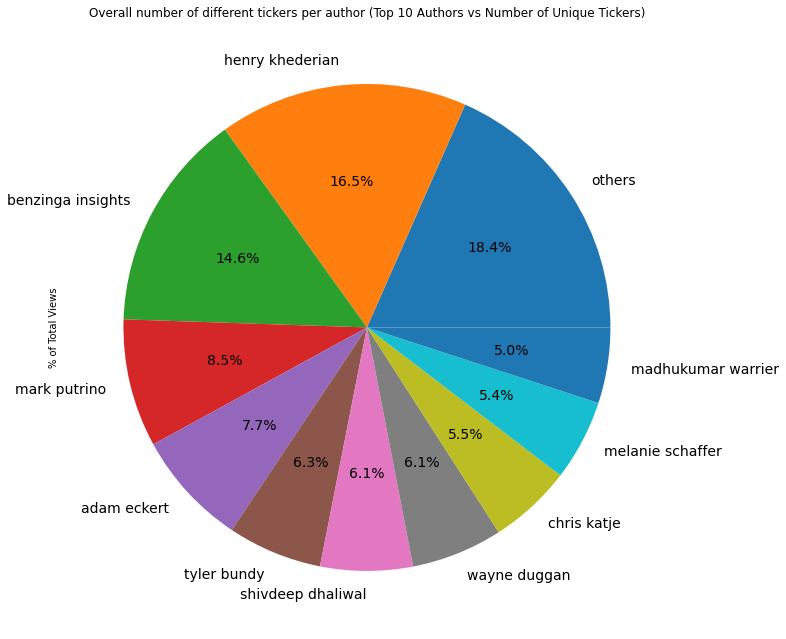

In [38]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total Views', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['Author'], legend = False, fontsize=14)
plt.title("Overall number of different tickers per author (Top 10 Authors vs Number of Unique Tickers)")

plt.savefig('4a.jpeg')
one.to_excel("4a.xlsx")

### Because Tickers has a catgorical value we can take the unique values, however for columns such as views, we will have to take the sum as it is numerical. To recheck making sure views for all authors calculated seperately as a groupby is the same as views sum of the outer_merged df

In [39]:
m = []
for x in all_authors:
    m.append(gk.get_group(x)["Views"].sum())

In [40]:
sum(m)

65265687

In [41]:
outer_merged["Views"].sum()

65265687

#### Creating a function 

In [42]:
def generate_author_insight(column):
    author_one = []
    for x in all_authors:
        one = {}
        one["Author"] = x
        one["value"] = gk.get_group(x)[column].sum()
        author_one.append(one)
    one = pd.DataFrame(author_one)
    tot = outer_merged[column].sum()
    one["% of Total values"] = round(((one["value"]/tot)*100),2)
    one = one.sort_values("value",ascending = False)
    others = {}
    tot_1 = one["value"].sum()
    others["Author"] = "others"
    others["value"]= tot_1-one.head(10)["value"].sum()
    others["% of Total values"] = 100-one.head(10)["% of Total values"].sum()
    others = pd.DataFrame(list(others.items())).T
    others.columns = others.iloc[0]
    others = others[1:]
    one = one.head(10)
    one = one.append(others)
    one = one.sort_values("value", ascending=False)
    return one

#### 4b. Authors with the most overall pageviews (Top 10 Authors with the most views sum) - "Most popular authors all time" (Point 2 in Assignment)

In [43]:
gk.get_group(all_authors[0])["Views"].sum()

5390666

In [44]:
generate_author_insight("Views")

,Author,value,% of Total values
4,shivdeep dhaliwal,17493544,26.8
1,others,8917913,13.67
3,madhukumar warrier,8006302,12.27
2,henry khederian,6827967,10.46
0,chris katje,5390666,8.26
5,adrian zmudzinski,4838360,7.41
9,samyuktha sriram,4334206,6.64
1,wayne duggan,3028559,4.64
8,melanie schaffer,2392398,3.67
7,adam eckert,2074637,3.18


In [45]:
one = generate_author_insight("Views")

In [46]:
one

,Author,value,% of Total values
4,shivdeep dhaliwal,17493544,26.8
1,others,8917913,13.67
3,madhukumar warrier,8006302,12.27
2,henry khederian,6827967,10.46
0,chris katje,5390666,8.26
5,adrian zmudzinski,4838360,7.41
9,samyuktha sriram,4334206,6.64
1,wayne duggan,3028559,4.64
8,melanie schaffer,2392398,3.67
7,adam eckert,2074637,3.18


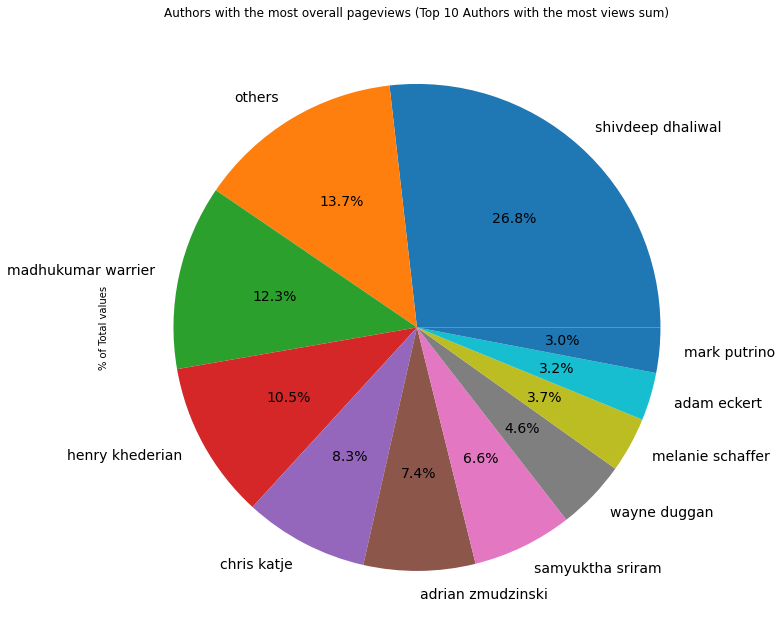

In [47]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['Author'], legend = False, fontsize=14)
plt.title("Authors with the most overall pageviews (Top 10 Authors with the most views sum)")

plt.savefig('4b.jpeg')
one.to_excel("4b.xlsx")

In [48]:
outer_merged.columns

Index(['Post id', 'URL', 'Title', 'Publish date', 'Authors', 'Visitors',
       'Views', 'Engaged minutes', 'New vis.', 'Views new vis.',
       'Minutes New Vis.', 'Returning vis.', 'Views ret. vis.',
       'Minutes Ret. Vis.', 'Desktop views', 'Mobile views', 'Tablet views',
       'Search refs', 'Internal refs', 'Other refs', 'Direct refs',
       'Social refs', 'Fb refs', 'Tw refs', 'Social interactions',
       'Fb interactions', 'Tw interactions', 'Website views', 'AMP views',
       'Tickers'],
      dtype='object')

#### 4c. Trending Most Popular Top 10 authors - (Top 10 Authors with the most Views new vis.)

In [49]:
generate_author_insight("Views new vis.")

,Author,value,% of Total values
4,shivdeep dhaliwal,3812953,22.61
0,chris katje,2241666,13.29
1,others,2140666,12.69
2,henry khederian,1871584,11.1
3,madhukumar warrier,1611817,9.56
1,wayne duggan,1495339,8.87
9,samyuktha sriram,1127867,6.69
5,adrian zmudzinski,1100285,6.53
8,melanie schaffer,520831,3.09
16,mark putrino,470551,2.79


In [50]:
one = generate_author_insight("Views new vis.")

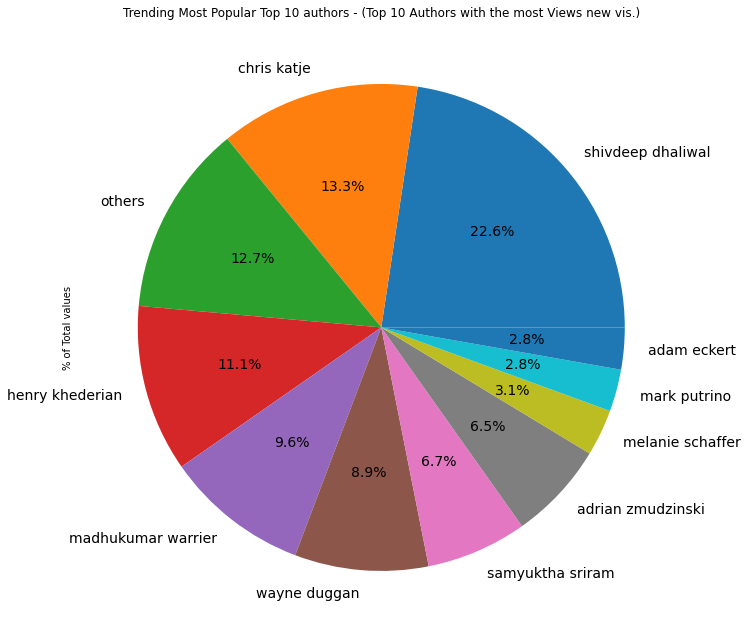

In [51]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['Author'], legend = False, fontsize=14)
plt.title("Trending Most Popular Top 10 authors - (Top 10 Authors with the most Views new vis.)")

plt.savefig('4c.jpeg')
one.to_excel("4c.xlsx")

#### 4d. Trending Most Engaging Top 10 authors - (Top 10 Authors with the most Minutes New Vis.)

In [52]:
generate_author_insight("Minutes New Vis.")

,Author,value,% of Total values
4,shivdeep dhaliwal,2.36709e+06,25.32
1,others,1.16413e+06,12.43
0,chris katje,1.09586e+06,11.72
3,madhukumar warrier,1.00516e+06,10.75
2,henry khederian,864289,9.24
1,wayne duggan,772129,8.26
9,samyuktha sriram,672023,7.19
5,adrian zmudzinski,583108,6.24
8,melanie schaffer,335405,3.59
7,adam eckert,252946,2.71


In [53]:
one = generate_author_insight("Minutes New Vis.")

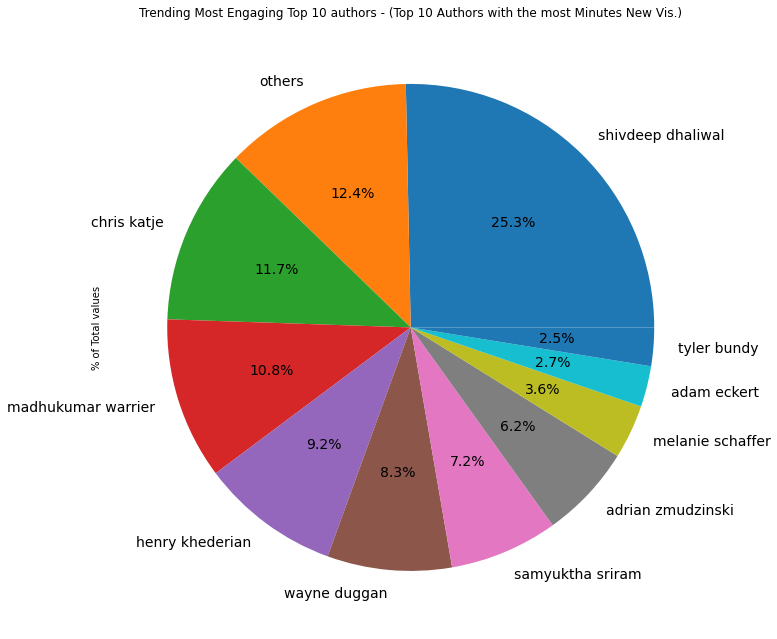

In [54]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['Author'], legend = False, fontsize=14)
plt.title("Trending Most Engaging Top 10 authors - (Top 10 Authors with the most Minutes New Vis.)")

plt.savefig('4d.jpeg')
one.to_excel("4d.xlsx")

In [55]:
# outer_merged.columns

#### 4e. Authors with the highest Conversion /Fan Base (Loyal readers) (Top 10 Authors with the most (Views ret. vis./Total Page views)) (Ratio 0.5)

#### For this we need a create a new column with views ret vis/total page views

In [56]:
outer_merged["Fan Base"] = round((outer_merged["Views ret. vis."]/outer_merged["Views"]),2)

In [57]:
outer_merged.iloc[:5,-6:]

,Fb interactions,Tw interactions,Website views,AMP views,Tickers,Fan Base
0,4005.0,453.0,874419,779365.0,tsla twtr,0.20
1,1308.0,210.0,1250578,148432.0,spy,0.25
2,9714.0,116.0,1102003,67569.0,cmcsa tsla,0.05
3,565.0,227.0,965474,143527.0,tsla twtr,0.49
4,2546.0,1949.0,987812,198114.0,amzn tsla,0.60


In [58]:
generate_author_insight("Fan Base")

,Author,value,% of Total values
1,others,471.38,33.62
2,henry khederian,170.33,12.15
29,benzinga insights,130.92,9.34
4,shivdeep dhaliwal,125.25,8.93
9,samyuktha sriram,92.17,6.57
7,adam eckert,84.51,6.03
16,mark putrino,83.21,5.94
3,madhukumar warrier,67.7,4.83
8,melanie schaffer,61.54,4.39
5,adrian zmudzinski,58.26,4.16


In [59]:
one = generate_author_insight("Fan Base")

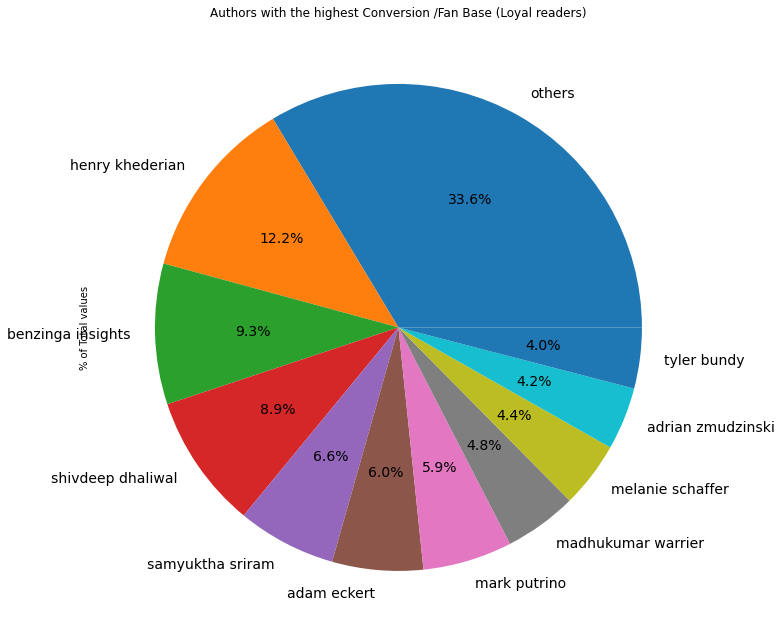

In [60]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['Author'], legend = False, fontsize=14)
plt.title("Authors with the highest Conversion /Fan Base (Loyal readers)")

plt.savefig('4e.jpeg')
one.to_excel("4e.xlsx")

#### 4f. Most Social Authors (Top 10 Authors with the highest Social Interactions)

In [61]:
generate_author_insight("Social interactions")

,Author,value,% of Total values
5,adrian zmudzinski,176672,40.78
4,shivdeep dhaliwal,58049,13.4
3,madhukumar warrier,47873,11.05
9,samyuktha sriram,41573,9.6
1,others,39294,9.08
0,chris katje,32591,7.52
10,neer varshney,13145,3.03
7,adam eckert,8079,1.86
8,melanie schaffer,6860,1.58
1,wayne duggan,4578,1.06


In [62]:
one = generate_author_insight("Social interactions")

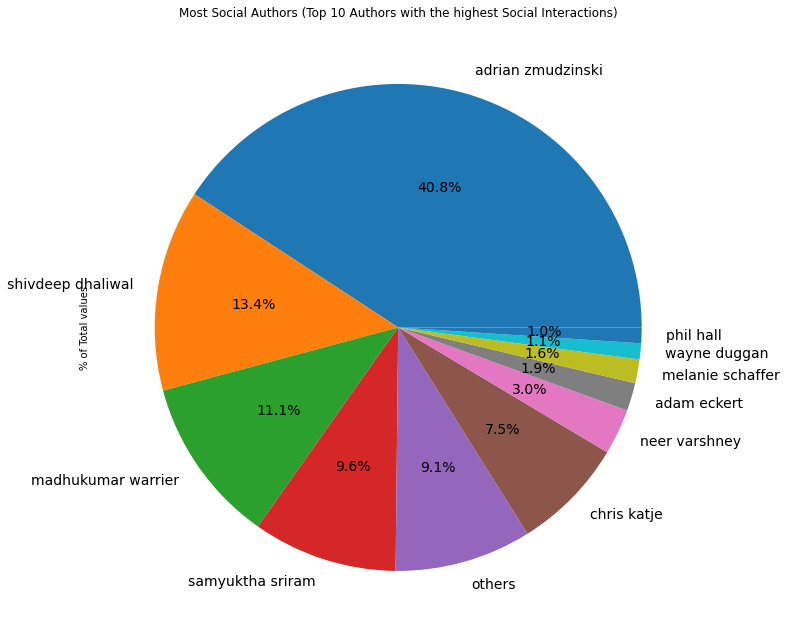

In [63]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['Author'], legend = False, fontsize=14)
plt.title("Most Social Authors (Top 10 Authors with the highest Social Interactions)")

plt.savefig('4f.jpeg')
one.to_excel("4f.xlsx")


#### 4g. SERP Ranking (Authors) (Top 10 Authors with the Highest Search Refs)

In [64]:
generate_author_insight("Search refs")

,Author,value,% of Total values
4,shivdeep dhaliwal,3.84535e+06,30.44
5,adrian zmudzinski,1.36114e+06,10.78
3,madhukumar warrier,1.332e+06,10.55
1,others,1.25398e+06,9.91
0,chris katje,1.09718e+06,8.69
9,samyuktha sriram,1.07636e+06,8.52
2,henry khederian,1.0672e+06,8.45
16,mark putrino,459673,3.64
8,melanie schaffer,458117,3.63
11,tyler bundy,383428,3.04


In [65]:
one = generate_author_insight("Search refs")

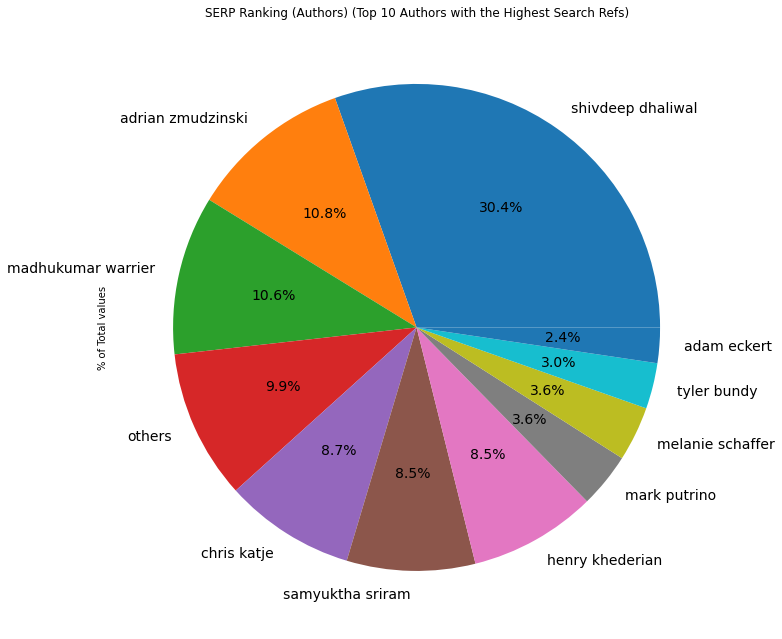

In [66]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['Author'], legend = False, fontsize=14)
plt.title("SERP Ranking (Authors) (Top 10 Authors with the Highest Search Refs)")

plt.savefig('4g.jpeg')
one.to_excel("4g.xlsx")



#### 4h: Topics the top 10 Authors cover (This is determined later using a clustering algorithm on the news articles/Unsupervised Topic Modelling) - Future Work

#### 4i: Top 10 Authors (Popularity by Device)

#### Desktop

In [67]:
generate_author_insight("Desktop views")

,Author,value,% of Total values
4,shivdeep dhaliwal,915642,21.69
1,others,808040,19.13
3,madhukumar warrier,407561,9.65
2,henry khederian,401669,9.51
9,samyuktha sriram,335590,7.95
0,chris katje,300756,7.12
5,adrian zmudzinski,297218,7.04
1,wayne duggan,228718,5.42
16,mark putrino,191547,4.54
8,melanie schaffer,177256,4.2


In [68]:
one= generate_author_insight("Desktop views")

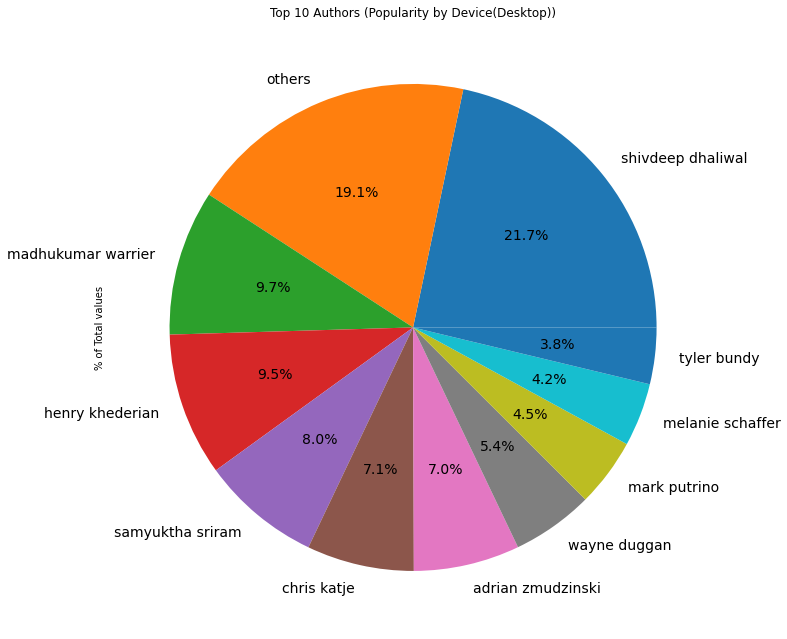

In [69]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['Author'], legend = False, fontsize=14)
plt.title("Top 10 Authors (Popularity by Device(Desktop))")

plt.savefig('4i.jpeg')
one.to_excel("4i.xlsx")




#### Mobile

In [70]:
generate_author_insight("Mobile views")

,Author,value,% of Total values
4,shivdeep dhaliwal,16419845,27.2
1,others,7976753,13.2
3,madhukumar warrier,7524649,12.46
2,henry khederian,6354615,10.53
0,chris katje,5038653,8.35
5,adrian zmudzinski,4495998,7.45
9,samyuktha sriram,3959269,6.56
1,wayne duggan,2772949,4.59
8,melanie schaffer,2182469,3.62
7,adam eckert,1901690,3.15


In [71]:
one = generate_author_insight("Mobile views")

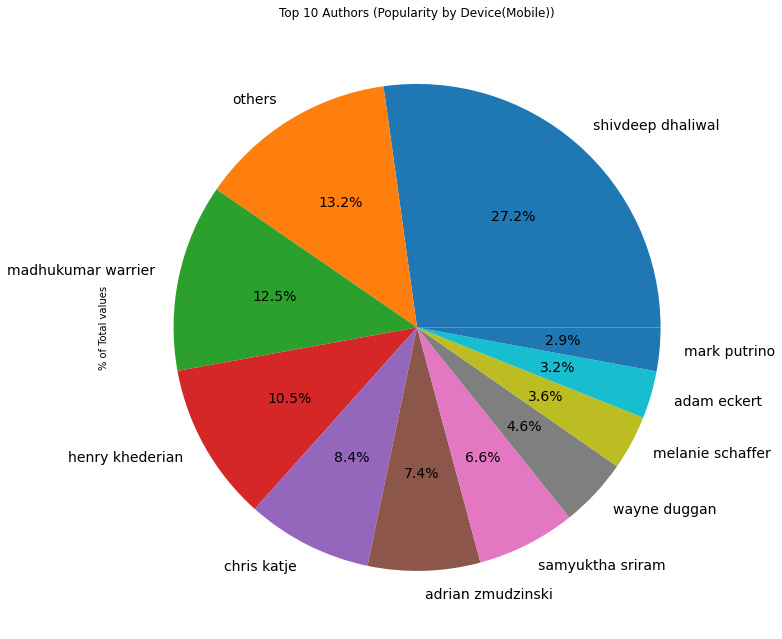

In [72]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['Author'], legend = False, fontsize=14)
plt.title("Top 10 Authors (Popularity by Device(Mobile))")

plt.savefig('4j.jpeg')
one.to_excel("4j.xlsx")




In [73]:
### Doing the Same 4a - 4i for Tickers now: 

### 4. Visualization Insights (Tickers)

#### 4a. Tickers with the most pageviews over time (Top 10 tickers with the most views sum) - "Most popular tickers all time" (Point 3 in Assignment)

In [74]:
gk = outer_merged.groupby(["Tickers"])

In [75]:
all_tickers[:10] #Has Nan Values, The outer merged df needs to be modified to take care of these nan values

['tsla twtr',
 'spy',
 'cmcsa tsla',
 'amzn tsla',
 'tsla',
 nan,
 'cag coin tsla',
 'emr hmc tsla vod',
 'amc coin gme',
 'goog googl tsla']

In [76]:
outer_merged.isnull().sum()

Post id                   0
URL                       0
Title                     0
Publish date              0
Authors                   0
Visitors                  0
Views                     0
Engaged minutes           0
New vis.                  0
Views new vis.            0
Minutes New Vis.          0
Returning vis.            0
Views ret. vis.           0
Minutes Ret. Vis.         0
Desktop views             0
Mobile views              0
Tablet views              3
Search refs               2
Internal refs             1
Other refs                2
Direct refs               0
Social refs             327
Fb refs                 790
Tw refs                 905
Social interactions     633
Fb interactions        1932
Tw interactions         692
Website views             0
AMP views                 5
Tickers                 550
Fan Base                  0
dtype: int64

#### Retaining rows with non null in Ticker

In [77]:
outer_merged = outer_merged[outer_merged['Tickers'].notna()]

In [78]:
outer_merged.isnull().sum()

Post id                   0
URL                       0
Title                     0
Publish date              0
Authors                   0
Visitors                  0
Views                     0
Engaged minutes           0
New vis.                  0
Views new vis.            0
Minutes New Vis.          0
Returning vis.            0
Views ret. vis.           0
Minutes Ret. Vis.         0
Desktop views             0
Mobile views              0
Tablet views              2
Search refs               2
Internal refs             1
Other refs                2
Direct refs               0
Social refs             312
Fb refs                 734
Tw refs                 839
Social interactions     604
Fb interactions        1654
Tw interactions         652
Website views             0
AMP views                 4
Tickers                   0
Fan Base                  0
dtype: int64

In [79]:
gk = outer_merged.groupby(["Tickers"])
all_tickers = outer_merged["Tickers"].unique().tolist()

In [80]:
len(all_tickers)

1435

In [81]:
gk.get_group(all_tickers[1234])

,Post id,URL,Title,Publish date,Authors,Visitors,Views,Engaged minutes,New vis.,Views new vis.,...,Social refs,Fb refs,Tw refs,Social interactions,Fb interactions,Tw interactions,Website views,AMP views,Tickers,Fan Base
2560,21343169,https://www.benzinga.com/markets/cannabis/21/0...,Cannabis Retailer High Tide To Commence Tradin...,2021-05-28 13:15,jelena martinovic,499,589,289,215,239,...,154.0,NaN,153.0,38.0,NaN,38.0,412,177.0,hitid tsxv:hiti,0.29


#### Creating a function 

In [82]:
def generate_ticker_insight(column):
    ticker_one = []
    for x in all_tickers:
        one = {}
        one["ticker"] = x
        one["value"] = gk.get_group(x)[column].sum()
        ticker_one.append(one)
    one = pd.DataFrame(ticker_one)
    tot = outer_merged[column].sum()
    one["% of Total values"] = round(((one["value"]/tot)*100),2)
    one = one.sort_values("value",ascending = False).head(10)
    others = {}
    tot_1 = one["value"].sum()
    others["ticker"] = "others"
    others["value"]= tot_1-one.head(10)["value"].sum()
    others["% of Total values"] = 100-one.head(10)["% of Total values"].sum()
    others = pd.DataFrame(list(others.items())).T
    others.columns = others.iloc[0]
    others = others[1:]
    one = one.head(10)
    one = one.append(others)
    one = one.sort_values("value", ascending=False)
    return one

In [83]:
outer_merged["Tickers"].isnull().sum()

0

In [84]:
# def generate_author_insight(column):
#     author_one = []
#     for x in all_authors:
#         one = {}
#         one["Author"] = x
#         one["value"] = gk.get_group(x)[column].sum()
#         author_one.append(one)
#     one = pd.DataFrame(author_one)
#     tot = outer_merged[column].sum()
#     one["% of Total values"] = round(((one["value"]/tot)*100),2)
#     one = one.sort_values("value",ascending = False)
#     others = {}
#     tot_1 = one["value"].sum()
#     others["Author"] = "others"
#     others["value"]= tot_1-one.head(10)["value"].sum()
#     others["% of Total values"] = 100-one.head(10)["% of Total values"].sum()
#     others = pd.DataFrame(list(others.items())).T
#     others.columns = others.iloc[0]
#     others = others[1:]
#     one = one.head(10)
#     one = one.append(others)
#     one = one.sort_values("value", ascending=False)
#     return one

#### 4a. Tickers with the most pageviews over time (Top 10 tickers with the most views sum) - "Most popular tickers all time" (Point 3 in Assignment)

In [85]:
gk.get_group(all_tickers[0])["Views"].sum()

4166305

In [86]:
generate_ticker_insight("Views")

,ticker,value,% of Total values
4,tsla,19071630,34.86
0,tsla twtr,4166305,7.62
2,cmcsa tsla,1665164,3.04
18,coin,1529471,2.8
1,spy,1512136,2.76
3,amzn tsla,1280751,2.34
10,coin tsla,809564,1.48
13,amc gme,803897,1.47
17,mstr tsla,687265,1.26
26,cag tsla,529151,0.97


In [87]:
one = generate_ticker_insight("Views")

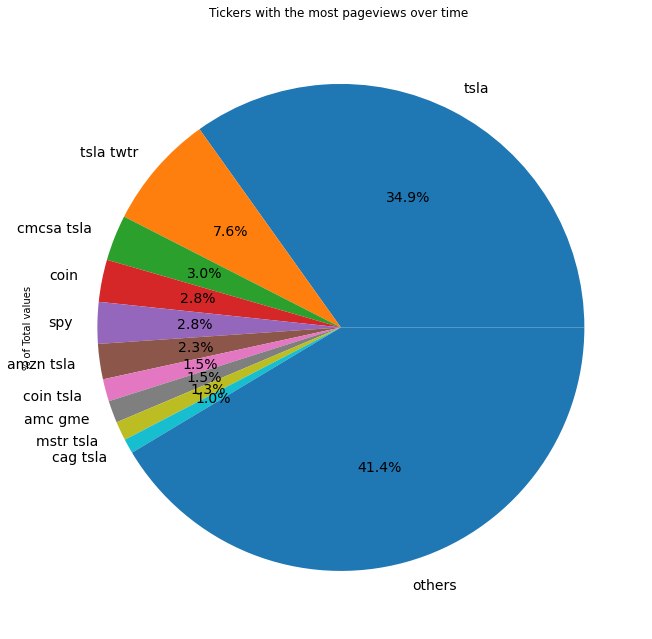

In [88]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['ticker'], legend = False, fontsize=14)
plt.title("Tickers with the most pageviews over time ")

plt.savefig('5a.jpeg')
one.to_excel("5a.xlsx")

In [89]:
outer_merged.columns

Index(['Post id', 'URL', 'Title', 'Publish date', 'Authors', 'Visitors',
       'Views', 'Engaged minutes', 'New vis.', 'Views new vis.',
       'Minutes New Vis.', 'Returning vis.', 'Views ret. vis.',
       'Minutes Ret. Vis.', 'Desktop views', 'Mobile views', 'Tablet views',
       'Search refs', 'Internal refs', 'Other refs', 'Direct refs',
       'Social refs', 'Fb refs', 'Tw refs', 'Social interactions',
       'Fb interactions', 'Tw interactions', 'Website views', 'AMP views',
       'Tickers', 'Fan Base'],
      dtype='object')

#### 4b. Most engaging tickers (Top 10 tickers with the most Engaged mins sum) "Most engaging tickers all time" (Point 4 in Assignment)

In [90]:
generate_ticker_insight('Engaged minutes')

,ticker,value,% of Total values
4,tsla,14574815,37.39
0,tsla twtr,2766708,7.1
18,coin,1136642,2.92
3,amzn tsla,1093718,2.81
2,cmcsa tsla,1019556,2.62
1,spy,961997,2.47
10,coin tsla,775994,1.99
13,amc gme,613572,1.57
17,mstr tsla,574488,1.47
5,cag coin tsla,429608,1.1


In [91]:
one = generate_ticker_insight('Engaged minutes')

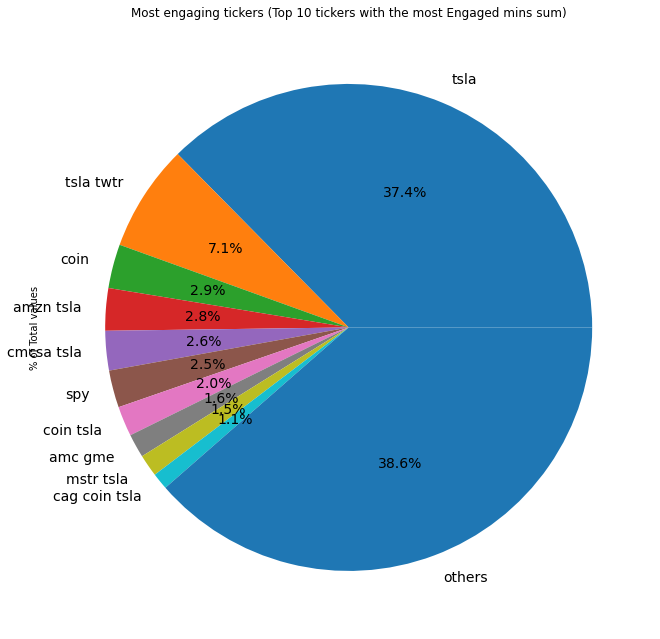

In [92]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['ticker'], legend = False, fontsize=14)
plt.title("Most engaging tickers (Top 10 tickers with the most Engaged mins sum)")

plt.savefig('5b.jpeg')
one.to_excel("5b.xlsx")

#### 4c. Trending Most Popular Top 10 Tickers - (Top 10 Tickers with the most Views new vis.)

In [93]:
generate_ticker_insight("Views new vis.")

,ticker,value,% of Total values
4,tsla,4494407,31.4
0,tsla twtr,1232939,8.61
2,cmcsa tsla,1148943,8.03
1,spy,926550,6.47
18,coin,315576,2.2
3,amzn tsla,294148,2.06
10,coin tsla,206852,1.45
13,amc gme,170824,1.19
35,amc,121147,0.85
17,mstr tsla,110632,0.77


In [94]:
one = generate_ticker_insight("Views new vis.")

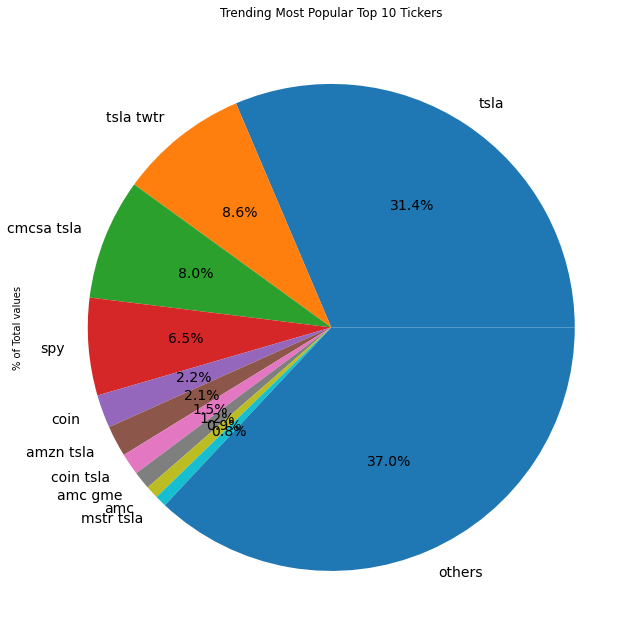

In [95]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['ticker'], legend = False, fontsize=14)
plt.title("Trending Most Popular Top 10 Tickers")

plt.savefig('5c.jpeg')
one.to_excel("5c.xlsx")


#### 4d. Trending Most Engaging Top 10 Tickers - (Top 10 Tickers with the most Minutes New Vis.)

In [96]:
generate_ticker_insight("Minutes New Vis.")

,ticker,value,% of Total values
4,tsla,2.63485e+06,33.24
0,tsla twtr,702958,8.87
2,cmcsa tsla,548302,6.92
1,spy,431503,5.44
3,amzn tsla,190860,2.41
18,coin,189143,2.39
10,coin tsla,145237,1.83
13,amc gme,107026,1.35
17,mstr tsla,73780,0.93
5,cag coin tsla,65011,0.82


In [97]:
one = generate_ticker_insight("Minutes New Vis.")

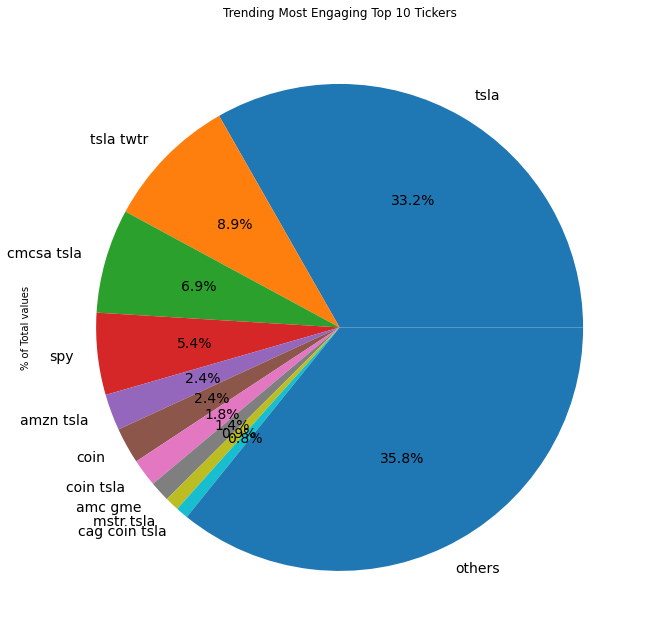

In [98]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['ticker'], legend = False, fontsize=14)
plt.title("Trending Most Engaging Top 10 Tickers")

plt.savefig('5d.jpeg')
one.to_excel("5d.xlsx")


In [99]:
# outer_merged.columns

#### 4e. Tickers with the highest Conversion /Fan Base (Loyal readers) (Top 10 Tickers with the most (Views ret. vis./Total Page views)) (Ratio 0.5)

#### This column already exists as Fan Base

In [100]:
# outer_merged["Fan Base"] = round((outer_merged["Views ret. vis."]/outer_merged["Views"]),2)

In [101]:
outer_merged.iloc[:5,-6:]

,Fb interactions,Tw interactions,Website views,AMP views,Tickers,Fan Base
0,4005.0,453.0,874419,779365.0,tsla twtr,0.20
1,1308.0,210.0,1250578,148432.0,spy,0.25
2,9714.0,116.0,1102003,67569.0,cmcsa tsla,0.05
3,565.0,227.0,965474,143527.0,tsla twtr,0.49
4,2546.0,1949.0,987812,198114.0,amzn tsla,0.60


In [102]:
generate_ticker_insight("Fan Base")

,ticker,value,% of Total values
4,tsla,113.65,9.6
18,coin,28.92,2.44
189,aapl,15.36,1.3
100,nio,10.49,0.89
141,amzn,9.37,0.79
1,spy,9.23,0.78
199,mara riot,8.78,0.74
180,baba,8.27,0.7
13,amc gme,8.13,0.69
17,mstr tsla,7.69,0.65


In [103]:
one = generate_ticker_insight("Fan Base")

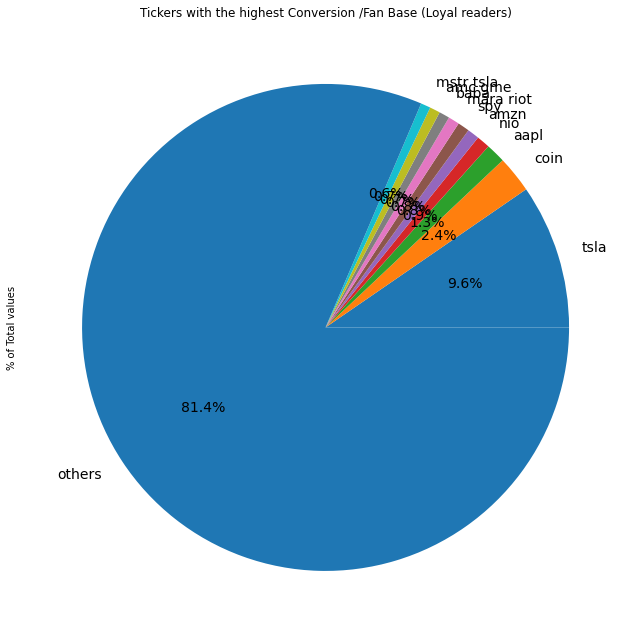

In [104]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['ticker'], legend = False, fontsize=14)
plt.title("Tickers with the highest Conversion /Fan Base (Loyal readers)")

plt.savefig('5e.jpeg')
one.to_excel("5e.xlsx")

#### 4f. Most Social Tickers (Top 10 Tickers with the highest Social Interactions)

In [105]:
generate_ticker_insight("Social interactions")

,ticker,value,% of Total values
4,tsla,99108,46.45
49,cwh negg,14671,6.88
2,cmcsa tsla,12046,5.65
0,tsla twtr,9426,4.42
3,amzn tsla,4835,2.27
18,coin,4240,1.99
26,cag tsla,4008,1.88
10,coin tsla,2912,1.36
520,btcm,2874,1.35
475,amzn lvmuy tsla,2695,1.26


In [106]:
one = generate_ticker_insight("Social interactions")

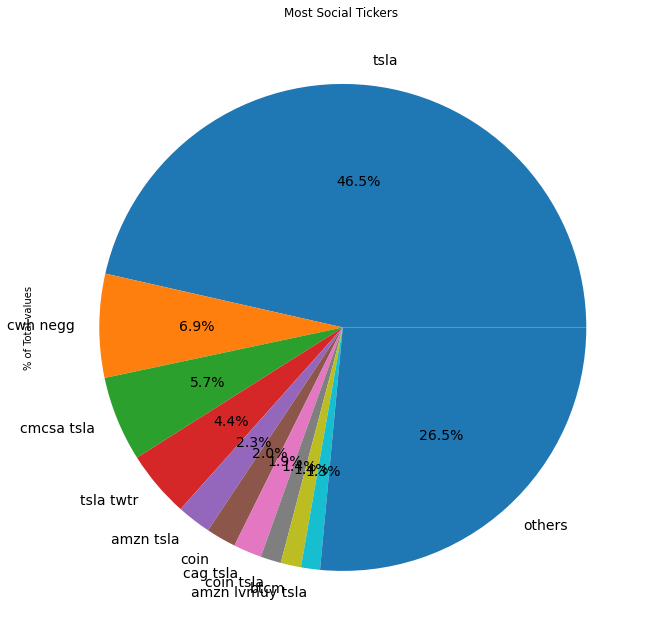

In [107]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['ticker'], legend = False, fontsize=14)
plt.title("Most Social Tickers ")

plt.savefig('5f.jpeg')
one.to_excel("5f.xlsx")

#### 4g. SERP Ranking (Tickers) (Top 10 Tickers with the Highest Search Refs)

In [108]:
generate_ticker_insight("Search refs")

,ticker,value,% of Total values
4,tsla,3.65369e+06,38.88
0,tsla twtr,1.01064e+06,10.75
18,coin,339742,3.62
7,amc coin gme,213624,2.27
13,amc gme,166491,1.77
2,cmcsa tsla,151368,1.61
3,amzn tsla,149845,1.59
23,gme,101562,1.08
1,spy,99585,1.06
40,cmcsa twtr vygvf,99338,1.06


In [109]:
one = generate_ticker_insight("Search refs")

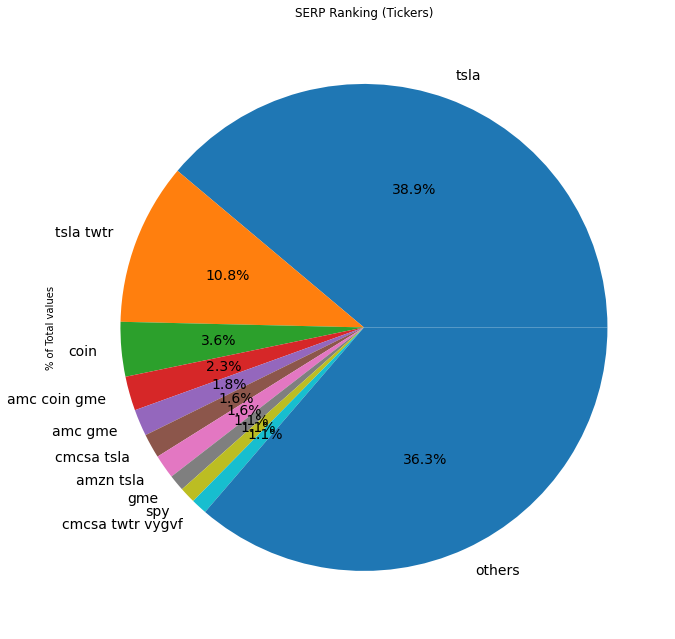

In [110]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['ticker'], legend = False, fontsize=14)
plt.title("SERP Ranking (Tickers)")

plt.savefig('5g.jpeg')
one.to_excel("5g.xlsx")

#### 4h: Topics the top 10 Tickers cover (This is determined later using a clustering algorithm on the news articles/Unsupervised Topic Modelling)

#### 4i: Top 10 Tickers (Popularity by Device)

#### Desktop

In [111]:
generate_ticker_insight("Desktop views")

,ticker,value,% of Total values
4,tsla,939818,27.2
0,tsla twtr,194372,5.63
18,coin,99284,2.87
1,spy,72626,2.1
13,amc gme,64931,1.88
3,amzn tsla,61000,1.77
2,cmcsa tsla,59227,1.71
23,gme,38372,1.11
10,coin tsla,29047,0.84
71,plug,27399,0.79


In [112]:
one = generate_ticker_insight("Desktop views")

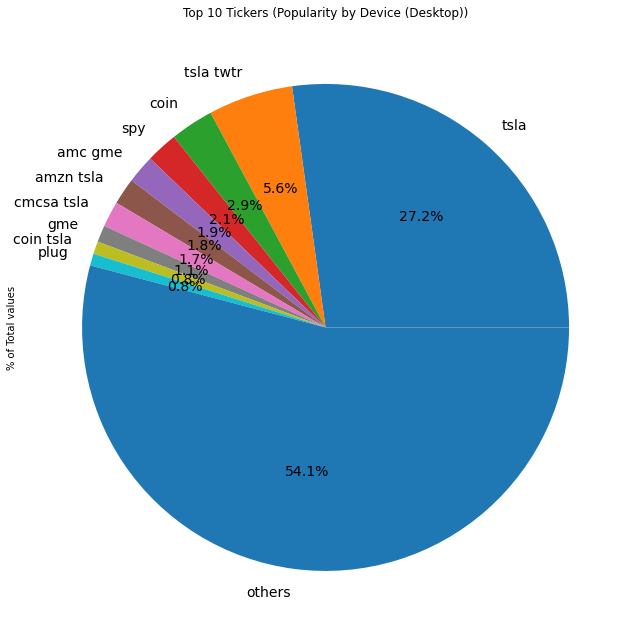

In [113]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['ticker'], legend = False, fontsize=14)
plt.title("Top 10 Tickers (Popularity by Device (Desktop))")

plt.savefig('5i.jpeg')
one.to_excel("5i.xlsx")

#### Mobile

In [114]:
generate_ticker_insight("Mobile views")

,ticker,value,% of Total values
4,tsla,17957057,35.43
0,tsla twtr,3931808,7.76
2,cmcsa tsla,1593553,3.14
1,spy,1427186,2.82
18,coin,1411612,2.79
3,amzn tsla,1209340,2.39
10,coin tsla,773655,1.53
13,amc gme,731554,1.44
17,mstr tsla,658582,1.3
26,cag tsla,504269,1


In [115]:
one = generate_ticker_insight("Mobile views")

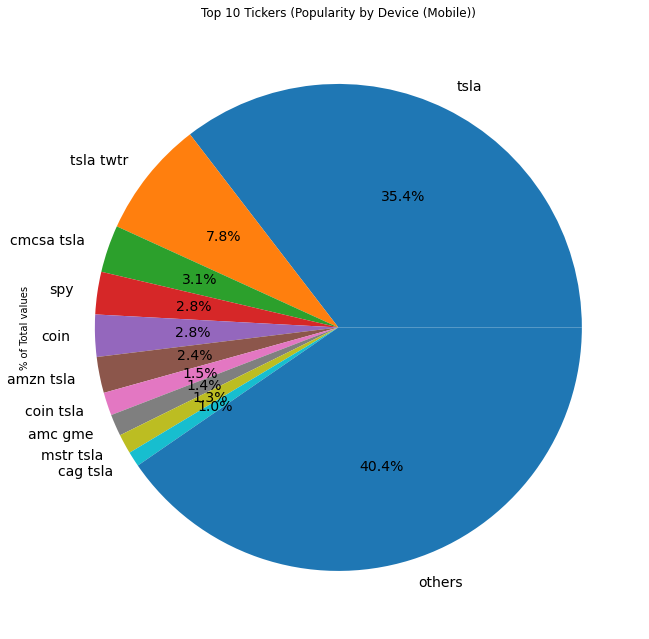

In [116]:
plt.figure(figsize=(24,12))

# plot chart
ax1 = plt.subplot(121)
one.plot(kind='pie', y = '% of Total values', ax=ax1,autopct = '%1.1f%%',
         startangle=0, shadow=False, labels=one['ticker'], legend = False, fontsize=14)
plt.title("Top 10 Tickers (Popularity by Device (Mobile))")

plt.savefig('5j.jpeg')
one.to_excel("5j.xlsx")

### 5. Module 2

#### Creating a dictionary for a user before creating the function

In [117]:
user = all_authors[0]

In [118]:
user

'chris katje'

In [119]:
outer_merged = outer_merged_original.copy()

### Traffic

In [120]:
final = {}
final["User"] = user
user_df = outer_merged[outer_merged["Authors"]==user] 
# Subsetting the df pertaining to the user


In [121]:
# visitors = outer_merged["Visitors"].sum()
# page_views = outer_merged["Views"].sum()

In [122]:
final["Unique Visitors"] = user_df["Visitors"].sum()
final["Total Page Views"] = user_df["Views"].sum()

In [123]:
final

{'User': 'chris katje',
 'Unique Visitors': 4582373,
 'Total Page Views': 5390666}

### Engagement

In [124]:
# engaged_mins = outer_merged["Engaged minutes"].sum()
final["Engaged Mins"] = user_df["Engaged minutes"].sum()

In [125]:
final

{'User': 'chris katje',
 'Unique Visitors': 4582373,
 'Total Page Views': 5390666,
 'Engaged Mins': 3237482}

### Retention

In [126]:
# rr = (outer_merged["New vis."]/outer_merged["Returning vis."]).sum()
# re = (outer_merged["Minutes New Vis."]/outer_merged["Minutes Ret. Vis."]).sum()
final["Return Rate"] = round((user_df["New vis."]/user_df["Returning vis."]).mean(),4)
final["Retention Engagement"] = round((user_df["Minutes New Vis."]/user_df["Minutes Ret. Vis."]).mean(),4)

In [127]:
final

{'User': 'chris katje',
 'Unique Visitors': 4582373,
 'Total Page Views': 5390666,
 'Engaged Mins': 3237482,
 'Return Rate': 1.1815,
 'Retention Engagement': 0.7764}

### Discovery

In [128]:
final["Discovery Ratio"] = round((user_df["New vis."]/user_df["Visitors"]).mean(),4)

In [129]:
final["SERP Mean"] = round(user_df["Search refs"].mean(),4)

In [130]:
final["S/O Ref"] = round((user_df["Search refs"]/user_df["Other refs"]).mean(),4)

In [131]:
final["Discovery Engagement"] = round((user_df["Minutes New Vis."]/user_df["Engaged minutes"]).mean(),4)

In [132]:
final

{'User': 'chris katje',
 'Unique Visitors': 4582373,
 'Total Page Views': 5390666,
 'Engaged Mins': 3237482,
 'Return Rate': 1.1815,
 'Retention Engagement': 0.7764,
 'Discovery Ratio': 0.3139,
 'SERP Mean': 11195.7653,
 'S/O Ref': 3.4518,
 'Discovery Engagement': 0.2797}

### Loyalty

In [133]:
final["Loyalty Ratio"] = round((user_df["Returning vis."]/user_df["Visitors"]).mean(),4)

In [134]:
final["Loyalty Engagement"] = round((user_df["Minutes Ret. Vis."]/user_df["Engaged minutes"]).mean(),4) 

In [135]:
final

{'User': 'chris katje',
 'Unique Visitors': 4582373,
 'Total Page Views': 5390666,
 'Engaged Mins': 3237482,
 'Return Rate': 1.1815,
 'Retention Engagement': 0.7764,
 'Discovery Ratio': 0.3139,
 'SERP Mean': 11195.7653,
 'S/O Ref': 3.4518,
 'Discovery Engagement': 0.2797,
 'Loyalty Ratio': 0.411,
 'Loyalty Engagement': 0.5003}

In [136]:
user_df.columns

Index(['Post id', 'URL', 'Title', 'Publish date', 'Authors', 'Visitors',
       'Views', 'Engaged minutes', 'New vis.', 'Views new vis.',
       'Minutes New Vis.', 'Returning vis.', 'Views ret. vis.',
       'Minutes Ret. Vis.', 'Desktop views', 'Mobile views', 'Tablet views',
       'Search refs', 'Internal refs', 'Other refs', 'Direct refs',
       'Social refs', 'Fb refs', 'Tw refs', 'Social interactions',
       'Fb interactions', 'Tw interactions', 'Website views', 'AMP views',
       'Tickers'],
      dtype='object')

In [137]:
total_refs = user_df["Search refs"]+user_df["Internal refs"]+user_df["Other refs"]+user_df["Direct refs"]+user_df["Social refs"]

In [138]:
final["Social Ref Ratio"] = round((user_df["Social refs"]/total_refs).mean(),4)

In [139]:
final["Number of Social Interactions"] = round(user_df["Social interactions"].sum(),4)

In [140]:
final

{'User': 'chris katje',
 'Unique Visitors': 4582373,
 'Total Page Views': 5390666,
 'Engaged Mins': 3237482,
 'Return Rate': 1.1815,
 'Retention Engagement': 0.7764,
 'Discovery Ratio': 0.3139,
 'SERP Mean': 11195.7653,
 'S/O Ref': 3.4518,
 'Discovery Engagement': 0.2797,
 'Loyalty Ratio': 0.411,
 'Loyalty Engagement': 0.5003,
 'Social Ref Ratio': 0.0553,
 'Number of Social Interactions': 32591.0}

### Device

In [141]:
handheld_views = user_df["Tablet views"]+user_df["Mobile views"]
final["Device Ratio"] = round((user_df["Desktop views"]/handheld_views).mean(),4)

In [142]:
final["Web to Mobile"] = round((user_df["Website views"]/user_df["AMP views"]).mean(),4) 

In [143]:
final

{'User': 'chris katje',
 'Unique Visitors': 4582373,
 'Total Page Views': 5390666,
 'Engaged Mins': 3237482,
 'Return Rate': 1.1815,
 'Retention Engagement': 0.7764,
 'Discovery Ratio': 0.3139,
 'SERP Mean': 11195.7653,
 'S/O Ref': 3.4518,
 'Discovery Engagement': 0.2797,
 'Loyalty Ratio': 0.411,
 'Loyalty Engagement': 0.5003,
 'Social Ref Ratio': 0.0553,
 'Number of Social Interactions': 32591.0,
 'Device Ratio': 0.3016,
 'Web to Mobile': 37.9387}

In [144]:
final = pd.DataFrame(list(final.items())).T

In [145]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,User,Unique Visitors,Total Page Views,Engaged Mins,Return Rate,Retention Engagement,Discovery Ratio,SERP Mean,S/O Ref,Discovery Engagement,Loyalty Ratio,Loyalty Engagement,Social Ref Ratio,Number of Social Interactions,Device Ratio,Web to Mobile
1,chris katje,4582373,5390666,3237482,1.1815,0.7764,0.3139,11195.8,3.4518,0.2797,0.411,0.5003,0.0553,32591,0.3016,37.9387


In [146]:
final.columns = final.iloc[0]

In [147]:
final = final[1:]

In [148]:
final

,User,Unique Visitors,Total Page Views,Engaged Mins,Return Rate,Retention Engagement,Discovery Ratio,SERP Mean,S/O Ref,Discovery Engagement,Loyalty Ratio,Loyalty Engagement,Social Ref Ratio,Number of Social Interactions,Device Ratio,Web to Mobile
1,chris katje,4582373,5390666,3237482,1.1815,0.7764,0.3139,11195.8,3.4518,0.2797,0.411,0.5003,0.0553,32591,0.3016,37.9387


#### Creating the Function

In [149]:
def generate_user_metrics(user):    
    final = {}
    final["User"] = user
    user_df = outer_merged[outer_merged["Authors"]==user] 
    final["Unique Visitors"] = user_df["Visitors"].sum()
    final["Total Page Views"] = user_df["Views"].sum()
    final["Engaged Mins"] = user_df["Engaged minutes"].sum()
    final["Return Rate"] = round((user_df["New vis."]/user_df["Returning vis."]).mean(),4)
    final["Retention Engagement"] = round((user_df["Minutes New Vis."]/user_df["Minutes Ret. Vis."]).mean(),4)
    final["Discovery Ratio"] = round((user_df["New vis."]/user_df["Visitors"]).mean(),4)
    final["SERP Mean"] = round(user_df["Search refs"].mean(),4)
    final["S/O Ref"] = round((user_df["Search refs"]/user_df["Other refs"]).mean(),4)
    final["Discovery Engagement"] = round((user_df["Minutes New Vis."]/user_df["Engaged minutes"]).mean(),4)
    final["Loyalty Ratio"] = round((user_df["Returning vis."]/user_df["Visitors"]).mean(),4)
    final["Loyalty Engagement"] = round((user_df["Minutes Ret. Vis."]/user_df["Engaged minutes"]).mean(),4) 
    total_refs = user_df["Search refs"]+user_df["Internal refs"]+user_df["Other refs"]+user_df["Direct refs"]+user_df["Social refs"]
    final["Social Ref Ratio"] = round((user_df["Social refs"]/total_refs).mean(),4)
    final["Number of Social Interactions"] = round(user_df["Social interactions"].sum(),4)
    handheld_views = user_df["Tablet views"]+user_df["Mobile views"]
    final["Device Ratio"] = round((user_df["Desktop views"]/handheld_views).mean(),4)
    final["Web to Mobile"] = round((user_df["Website views"]/user_df["AMP views"]).mean(),4) 
    final = pd.DataFrame(list(final.items())).T
    final.columns = final.iloc[0]
    final = final[1:]
    return final

In [150]:
user

'chris katje'

In [151]:
final_author_metrics = []
for x in all_authors:
    final_author_metrics.append(generate_user_metrics(x))

In [152]:
final_author_metrics = pd.concat(final_author_metrics)

In [153]:
final_author_metrics.head(10)

,User,Unique Visitors,Total Page Views,Engaged Mins,Return Rate,Retention Engagement,Discovery Ratio,SERP Mean,S/O Ref,Discovery Engagement,Loyalty Ratio,Loyalty Engagement,Social Ref Ratio,Number of Social Interactions,Device Ratio,Web to Mobile
1,chris katje,4582373,5390666,3237482,1.1815,0.7764,0.3139,11195.8,3.4518,0.2797,0.411,0.5003,0.0553,32591,0.3016,37.9387
1,wayne duggan,2555490,3028559,2112156,0.8987,0.6212,0.3367,1927.19,1.5837,0.2876,0.4555,0.5497,0.0416,4578,0.5708,21.166
1,henry khederian,5822528,6827967,3822105,0.6133,0.4788,0.281,3617.62,1.8603,0.2389,0.5706,0.6527,0.0083,4329,0.2089,80.8169
1,madhukumar warrier,6916234,8006302,6454458,0.4298,0.3009,0.2075,11684.2,1.4034,0.1675,0.5932,0.6766,0.0185,47873,0.0744,48.759
1,shivdeep dhaliwal,15425542,17493544,14103345,0.5812,0.4557,0.2057,15505.4,3.0031,0.1781,0.5034,0.5844,0.0247,58049,0.1114,30.1558
1,adrian zmudzinski,4207988,4838360,3094231,0.899,0.6569,0.2486,10008.4,2.812,0.2278,0.4269,0.5173,0.061,176672,0.1623,8.1759
1,shanthi rexaline,1023338,1327966,1006061,0.5421,0.3896,0.2458,2992.96,1.4057,0.2113,0.5419,0.6366,0.0107,1752,0.2855,23.7305
1,adam eckert,1824760,2074637,1362722,0.6945,0.5403,0.2784,1834.12,1.8658,0.2492,0.5146,0.5821,0.0301,8079,0.2296,57.3401
1,melanie schaffer,2085700,2392398,1882174,0.707,0.5656,0.2514,3635.85,2.6512,0.2245,0.4789,0.5407,0.0274,6860,0.1765,37.9031
1,samyuktha sriram,3890757,4334206,3177074,0.834,0.6063,0.2575,5276.28,2.6273,0.233,0.4494,0.5374,0.0737,41573,0.1751,31.705


### Generating the same metrics table for Tickers

In [154]:
outer_merged = outer_merged_original.copy()
outer_merged = outer_merged[outer_merged['Tickers'].notna()]

In [155]:
def generate_ticker_metrics(ticker):    
    final = {}
    final["ticker"] = ticker
    user_df = outer_merged[outer_merged["Tickers"]==ticker] 
    final["Unique Visitors"] = user_df["Visitors"].sum()
    final["Total Page Views"] = user_df["Views"].sum()
    final["Engaged Mins"] = user_df["Engaged minutes"].sum()
    final["Return Rate"] = round((user_df["New vis."]/user_df["Returning vis."]).mean(),4)
    final["Retention Engagement"] = round((user_df["Minutes New Vis."]/user_df["Minutes Ret. Vis."]).mean(),4)
    final["Discovery Ratio"] = round((user_df["New vis."]/user_df["Visitors"]).mean(),4)
    final["SERP Mean"] = round(user_df["Search refs"].mean(),4)
    final["S/O Ref"] = round((user_df["Search refs"]/user_df["Other refs"]).mean(),4)
    final["Discovery Engagement"] = round((user_df["Minutes New Vis."]/user_df["Engaged minutes"]).mean(),4)
    final["Loyalty Ratio"] = round((user_df["Returning vis."]/user_df["Visitors"]).mean(),4)
    final["Loyalty Engagement"] = round((user_df["Minutes Ret. Vis."]/user_df["Engaged minutes"]).mean(),4) 
    total_refs = user_df["Search refs"]+user_df["Internal refs"]+user_df["Other refs"]+user_df["Direct refs"]+user_df["Social refs"]
    final["Social Ref Ratio"] = round((user_df["Social refs"]/total_refs).mean(),4)
    final["Number of Social Interactions"] = round(user_df["Social interactions"].sum(),4)
    handheld_views = user_df["Tablet views"]+user_df["Mobile views"]
    final["Device Ratio"] = round((user_df["Desktop views"]/handheld_views).mean(),4)
    final["Web to Mobile"] = round((user_df["Website views"]/user_df["AMP views"]).mean(),4) 
    final = pd.DataFrame(list(final.items())).T
    final.columns = final.iloc[0]
    final = final[1:]
    return final

In [156]:
final_ticker_metrics = []
for x in all_tickers:
    final_ticker_metrics.append(generate_ticker_metrics(x))

In [157]:
final_ticker_metrics = pd.concat(final_ticker_metrics)

In [158]:
final_ticker_metrics.head(10)

,ticker,Unique Visitors,Total Page Views,Engaged Mins,Return Rate,Retention Engagement,Discovery Ratio,SERP Mean,S/O Ref,Discovery Engagement,Loyalty Ratio,Loyalty Engagement,Social Ref Ratio,Number of Social Interactions,Device Ratio,Web to Mobile
1,tsla twtr,3627553,4166305,2766708,0.5814,0.4332,0.2265,67375.7,1.7061,0.1857,0.4923,0.5802,0.0173,9426,0.0686,24.5304
1,spy,1256568,1512136,961997,0.8837,0.5615,0.3445,5857.94,5.299,0.2817,0.4736,0.5809,0.0227,1604,1.2153,34.2313
1,cmcsa tsla,1375602,1665164,1019556,5.9229,2.1557,0.4619,50456,1.3147,0.3932,0.4042,0.5213,0.2933,12046,0.0708,8.6368
1,amzn tsla,992007,1280751,1093718,0.2953,0.2046,0.2011,49948.3,0.4072,0.1589,0.6963,0.7814,0.0177,4835,0.0425,11.0389
1,tsla,16665953,19071630,14574815,0.5491,0.3763,0.2206,17234.4,1.774,0.1809,0.5344,0.63,0.0374,99108,0.08,51.4523
1,cag coin tsla,379767,442379,429608,0.316,0.1929,0.2093,31792,0.2385,0.1513,0.6623,0.7844,0.002,107,0.0549,7.6679
1,emr hmc tsla vod,341699,381340,231962,0.4117,0.2854,0.1954,88552,0.5612,0.1722,0.4747,0.6032,0.0086,2022,0.0582,2.1701
1,amc coin gme,339915,388786,237738,0.8651,0.6421,0.1692,213624,2.4882,0.1539,0.1956,0.2397,0.0042,312,0.0464,0.5483
1,goog googl tsla,303229,358125,342967,0.3376,0.2149,0.2176,35311,0.3641,0.1632,0.6447,0.7593,0.0008,144,0.0539,7.161
1,goog googl,280797,323756,282206,0.618,0.4619,0.2813,4918.6,1.4874,0.2557,0.4991,0.5867,0.0336,179,0.2071,12.1833


In [160]:
outer_merged.head()

,Post id,URL,Title,Publish date,Authors,Visitors,Views,Engaged minutes,New vis.,Views new vis.,...,Direct refs,Social refs,Fb refs,Tw refs,Social interactions,Fb interactions,Tw interactions,Website views,AMP views,Tickers
0,20651125,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Dogecoin On Jan. 1, ...",2021-04-15 18:54,chris katje,1480963,1653809,816933,485201,536823,...,556932,33261.0,27346.0,5787.0,4490.0,4005.0,453.0,874419,779365.0,tsla twtr
1,20665455,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Bitcoin, Ethereum, D...",2021-04-16 17:16,wayne duggan,1177830,1399044,903453,771047,894729,...,916802,5756.0,4878.0,660.0,1523.0,1308.0,210.0,1250578,148432.0,spy
2,21020948,https://www.benzinga.com/markets/cryptocurrenc...,If You Invested $100 When Elon Musk First Twee...,2021-05-08 9:26,chris katje,967238,1169572,601996,862501,1038922,...,34909,993337.0,992161.0,1162.0,9832.0,9714.0,116.0,1102003,67569.0,cmcsa tsla
3,20671395,https://www.benzinga.com/markets/cryptocurrenc...,Will Dogecoin Reach $1 By 2022? | Benzinga,2021-04-17 10:43,henry khederian,916345,1109010,803354,365547,421665,...,727132,1147.0,840.0,115.0,794.0,565.0,227.0,965474,143527.0,tsla twtr
4,20763772,https://www.benzinga.com/markets/cryptocurrenc...,What Will It Take For Dogecoin To Hit $1? Jeff...,2021-04-23 4:40,madhukumar warrier,908241,1185938,1026554,211677,276706,...,617590,8857.0,6165.0,2219.0,4497.0,2546.0,1949.0,987812,198114.0,amzn tsla


In [161]:
final_author_metrics.to_excel("final_author_metrics.xlsx")
final_ticker_metrics.to_excel("final_ticker_metrics.xlsx")

### Module 3: Topic Modelling

In [162]:
import re, numpy as np, pandas as pd
from pprint import pprint
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


In [163]:
outer_merged = outer_merged_original.copy()

In [164]:
outer_merged.head(2)

,Post id,URL,Title,Publish date,Authors,Visitors,Views,Engaged minutes,New vis.,Views new vis.,...,Direct refs,Social refs,Fb refs,Tw refs,Social interactions,Fb interactions,Tw interactions,Website views,AMP views,Tickers
0,20651125,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Dogecoin On Jan. 1, ...",2021-04-15 18:54,chris katje,1480963,1653809,816933,485201,536823,...,556932,33261.0,27346.0,5787.0,4490.0,4005.0,453.0,874419,779365.0,tsla twtr
1,20665455,https://www.benzinga.com/markets/cryptocurrenc...,"If You Invested $1,000 In Bitcoin, Ethereum, D...",2021-04-16 17:16,wayne duggan,1177830,1399044,903453,771047,894729,...,916802,5756.0,4878.0,660.0,1523.0,1308.0,210.0,1250578,148432.0,spy


In [165]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  


data = outer_merged["Title"].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['if', 'you', 'invested', 'in', 'dogecoin', 'on', 'jan', 'heres', 'how', 'much', 'youd', 'have', 'now', 'benzinga']]


In [166]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)

In [167]:
id2word = corpora.Dictionary(data_ready)
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.131*"benzinga" + 0.063*"grow" + 0.062*"gap" + 0.062*"chart" + 0.045*"co" '
  '+ 0.032*"launch" + 0.024*"exclusive" + 0.023*"bet" + 0.023*"sale" + '
  '0.021*"stand"'),
 (1,
  '0.044*"asset" + 0.029*"spike" + 0.028*"unique" + 0.027*"clinical" + '
  '0.026*"trial" + 0.024*"generate" + 0.024*"phase" + 0.023*"delivery" + '
  '0.022*"success" + 0.021*"digital"'),
 (2,
  '0.119*"industry" + 0.094*"benzinga" + 0.054*"debt" + 0.049*"company" + '
  '0.047*"market" + 0.028*"first" + 0.027*"win" + 0.024*"merger" + '
  '0.018*"marijuana" + 0.017*"acquisition"'),
 (3,
  '0.207*"benzinga" + 0.107*"analyst" + 0.036*"expert_rating" + '
  '0.035*"investor" + 0.026*"support" + 0.025*"reach" + 0.024*"bullish" + '
  '0.021*"result" + 0.020*"entrepreneur" + 0.018*"upgrade"'),
 (4,
  '0.128*"benzinga" + 0.098*"week" + 0.091*"move" + 0.084*"cost" + 0.052*"new" '
  '+ 0.033*"revenue" + 0.031*"buy" + 0.017*"report" + 0.016*"investment" + '
  '0.015*"gold"'),
 (5,
  '0.241*"cannabis" + 0.165*"benzinga

### Topic Models

 - Topic 1 talks about benzinga, charts, launches etc
 - Topic 2 talks about medical trials, phases of testing etc
 - Topic 3 talks about benzinga as a company
 - Topic 4 talks about benzinga ratings, bullish strategies etc;
 - Topic 5 talks about revenues, buy-sell commodities etc;
 - Topic 6 talks about cannabis, psychedelic use, this is probabaly due to the fact that there is a company named benzinga cannabis as well
 - Topic 7 talks about share prices today etc
 - Topic 8 talks about similar things such as Topic 10
 - Topic 9 talks about growth in trading
 - Topic 10 talks about random topics

#### Because the Topic modelling has been done on Titles and not text of the news, the quality of the topic models are significantly lower..

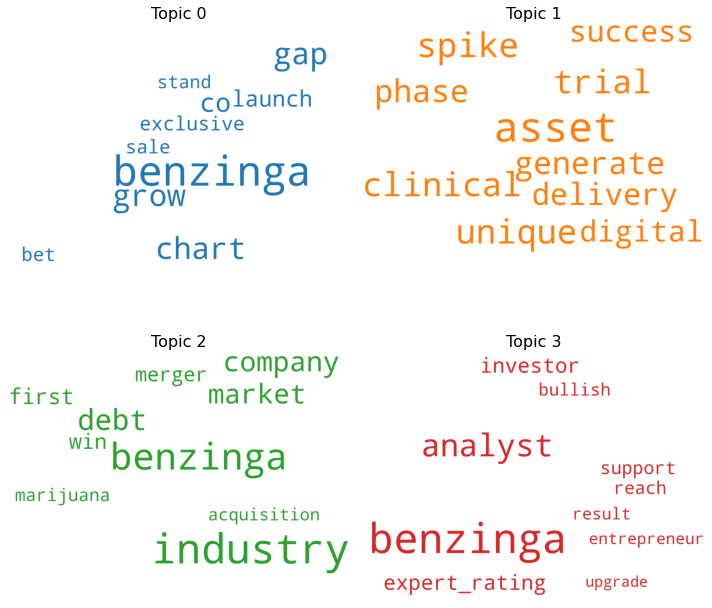

In [168]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

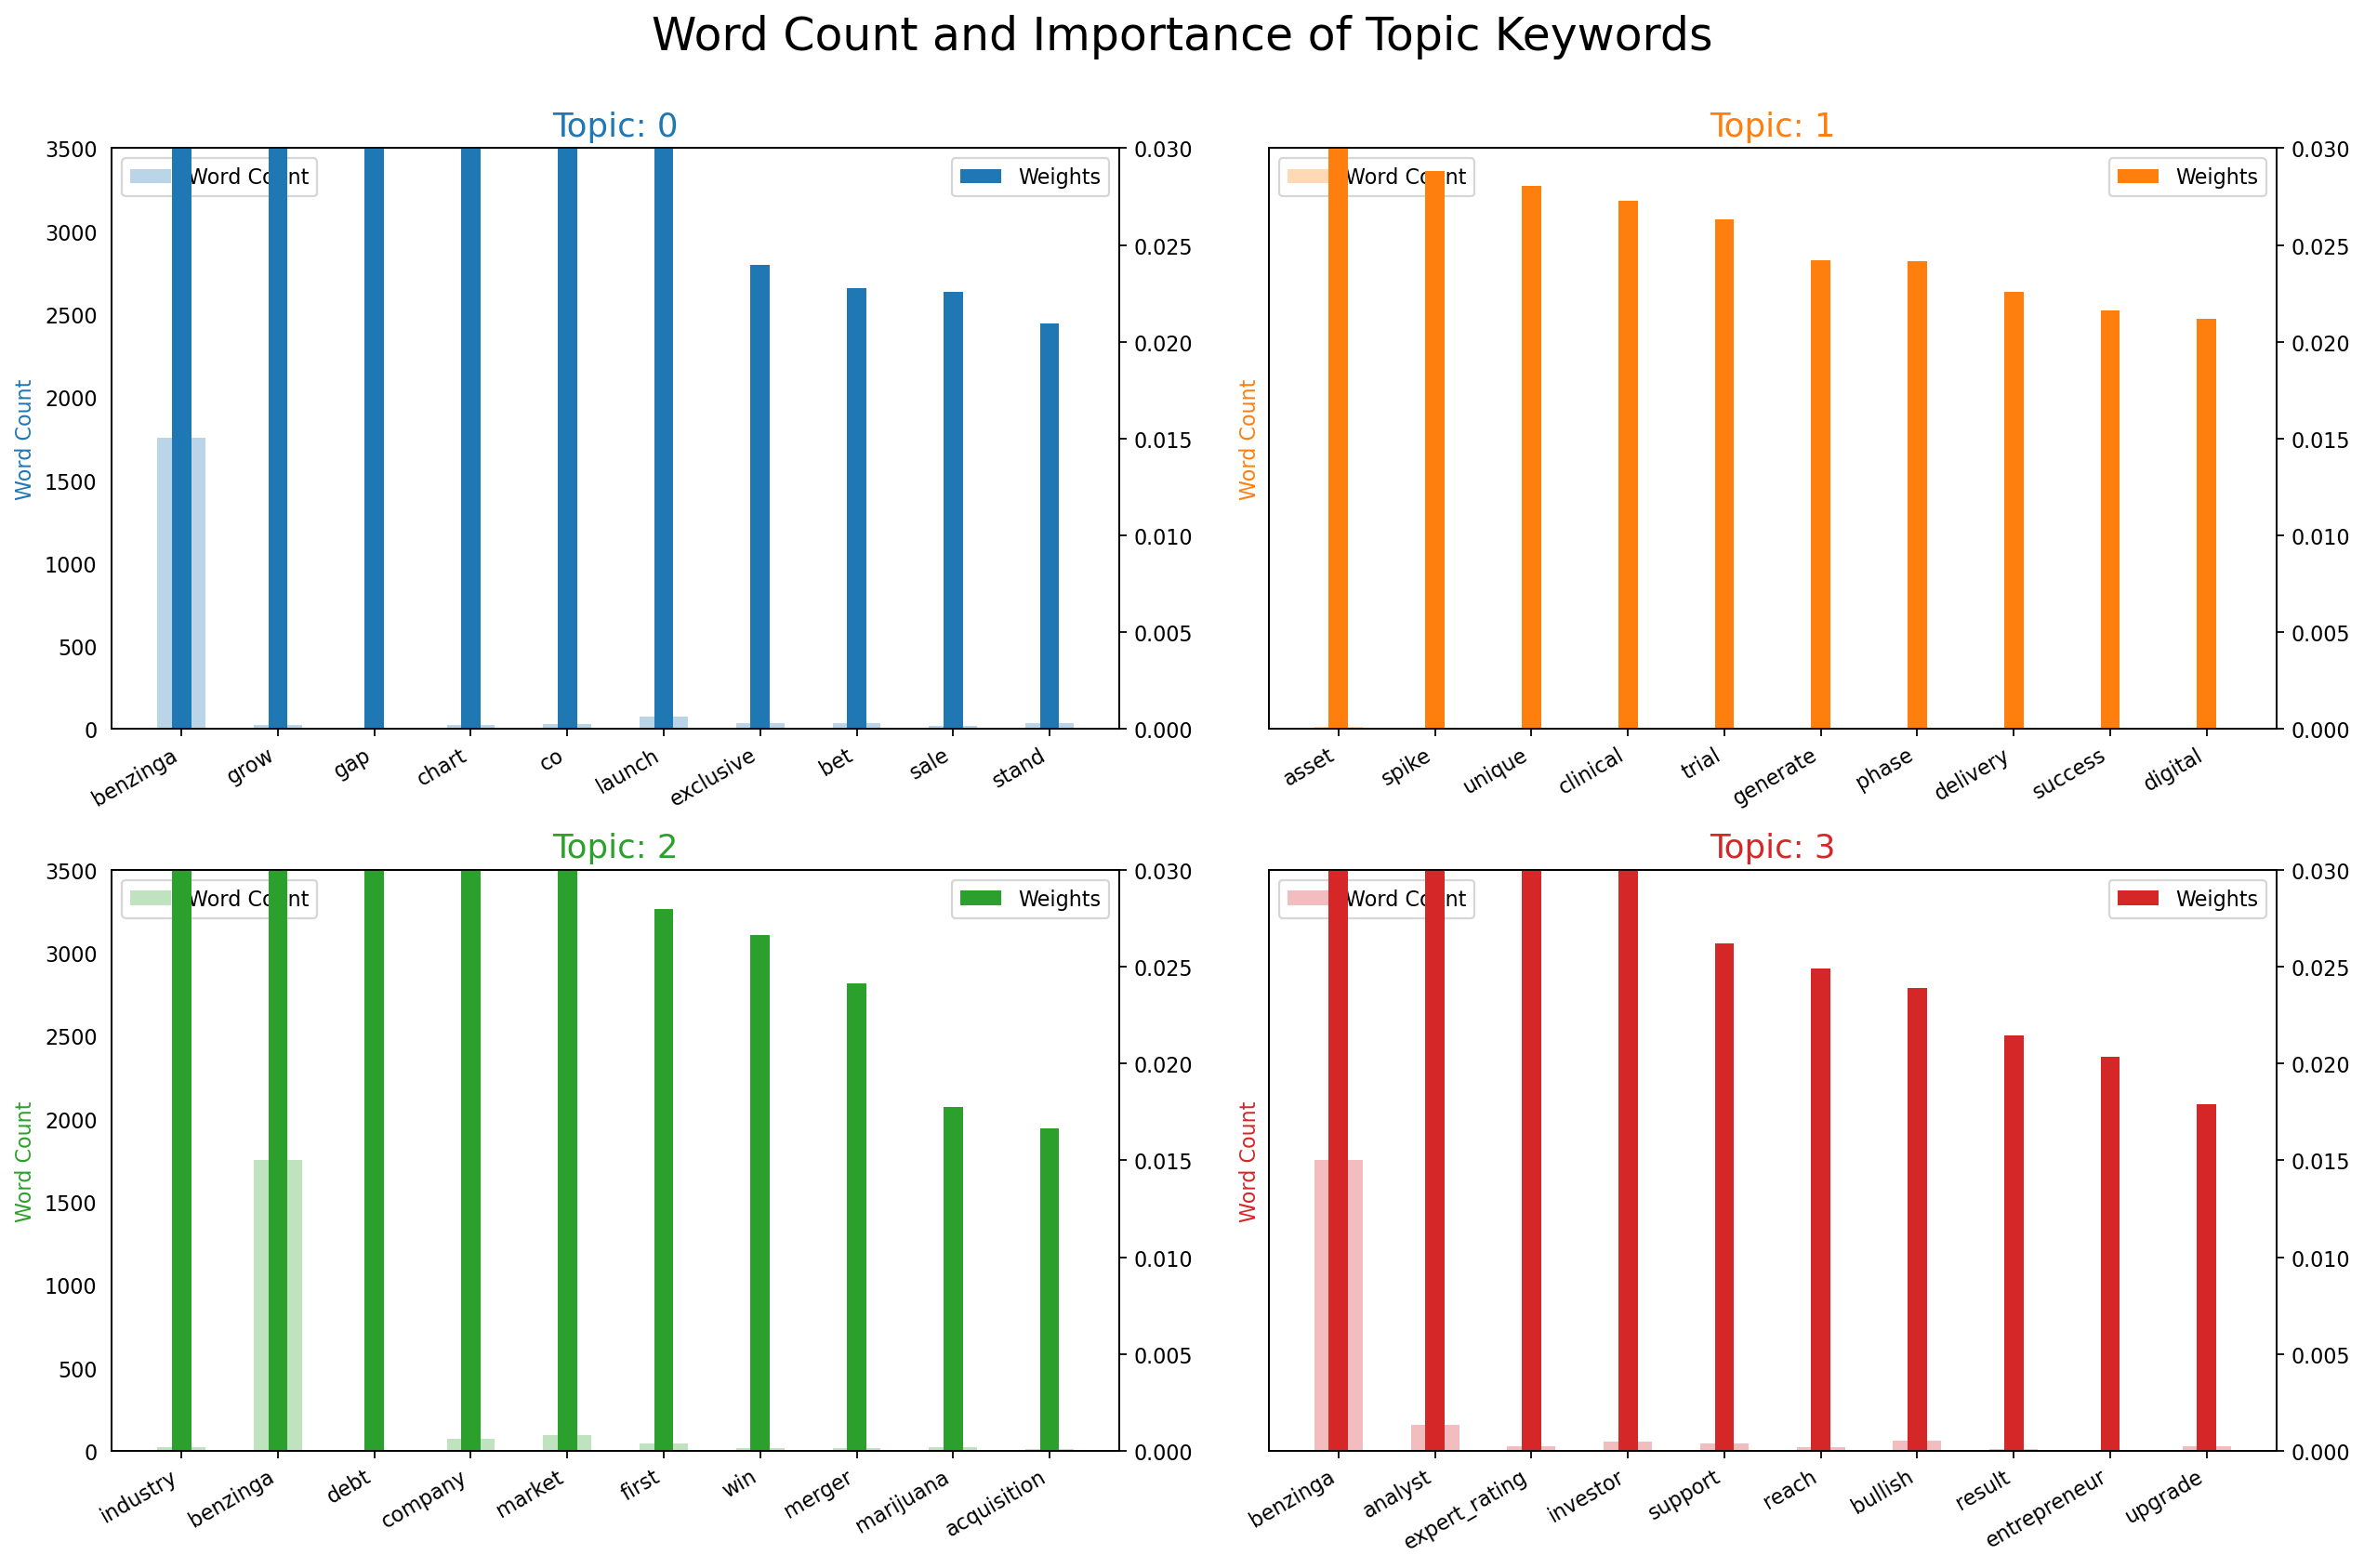

In [169]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [173]:
# def topics_per_document(model, corpus, start=0, end=1):
#     corpus_sel = corpus[start:end]
#     dominant_topics = []
#     topic_percentages = []
#     for i, corp in enumerate(corpus_sel):
#         topic_percs, wordid_topics, wordid_phivalues = model[corp]
#         dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
#         dominant_topics.append((i, dominant_topic))
#         topic_percentages.append(topic_percs)
#     return(dominant_topics, topic_percentages)

# dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# # Distribution of Dominant Topics in Each Document
# df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
# dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
# df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()
# topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
# df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# # Top 3 Keywords for each Topic
# topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
#                                  for j, (topic, wt) in enumerate(topics) if j < 3]

# df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
# df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
# df_top3words.reset_index(level=0,inplace=True)

In [172]:
# from matplotlib.ticker import FuncFormatter

# # Plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# # Topic Distribution by Dominant Topics
# ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
# ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
# tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
# ax1.xaxis.set_major_formatter(tick_formatter)
# ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
# ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 1000)
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

# plt.show()


In [174]:
### Re-Running this for 4 topics

In [175]:
id2word = corpora.Dictionary(data_ready)
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.064*"move" + 0.050*"today" + 0.032*"growth" + 0.032*"share" + '
  '0.031*"high" + 0.029*"trading" + 0.026*"psychedelic" + 0.013*"become" + '
  '0.012*"financial" + 0.012*"time"'),
 (1,
  '0.151*"cannabis" + 0.115*"benzinga" + 0.061*"stock" + 0.033*"industry" + '
  '0.026*"week" + 0.023*"gap" + 0.023*"debt" + 0.021*"cost" + 0.017*"co" + '
  '0.013*"company"'),
 (2,
  '0.101*"benzinga" + 0.042*"chart" + 0.024*"analyst_rating" + 0.016*"holding" '
  '+ 0.016*"sale" + 0.016*"revenue" + 0.014*"first" + 0.014*"deal" + '
  '0.013*"brand" + 0.009*"marijuana"'),
 (3,
  '0.134*"benzinga" + 0.036*"analyst" + 0.035*"grow" + 0.021*"new" + '
  '0.017*"bitcoin" + 0.014*"exclusive" + 0.013*"bet" + 0.013*"buy" + '
  '0.012*"stand" + 0.012*"top"')]


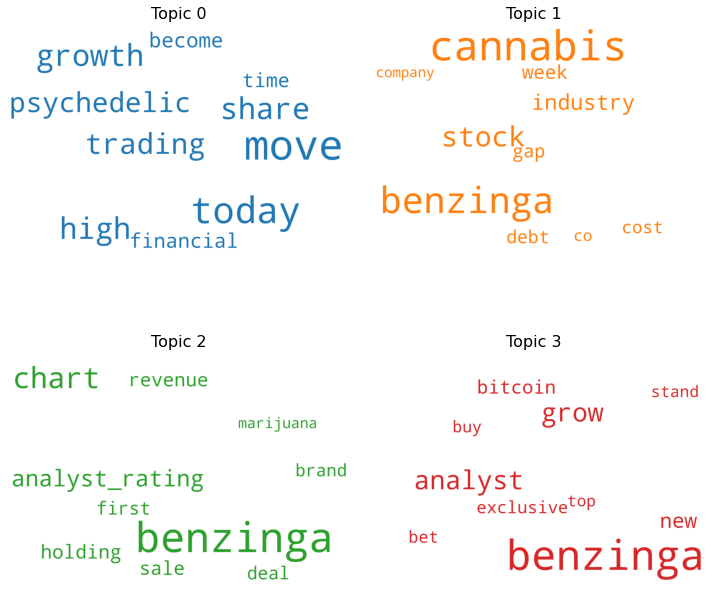

In [176]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

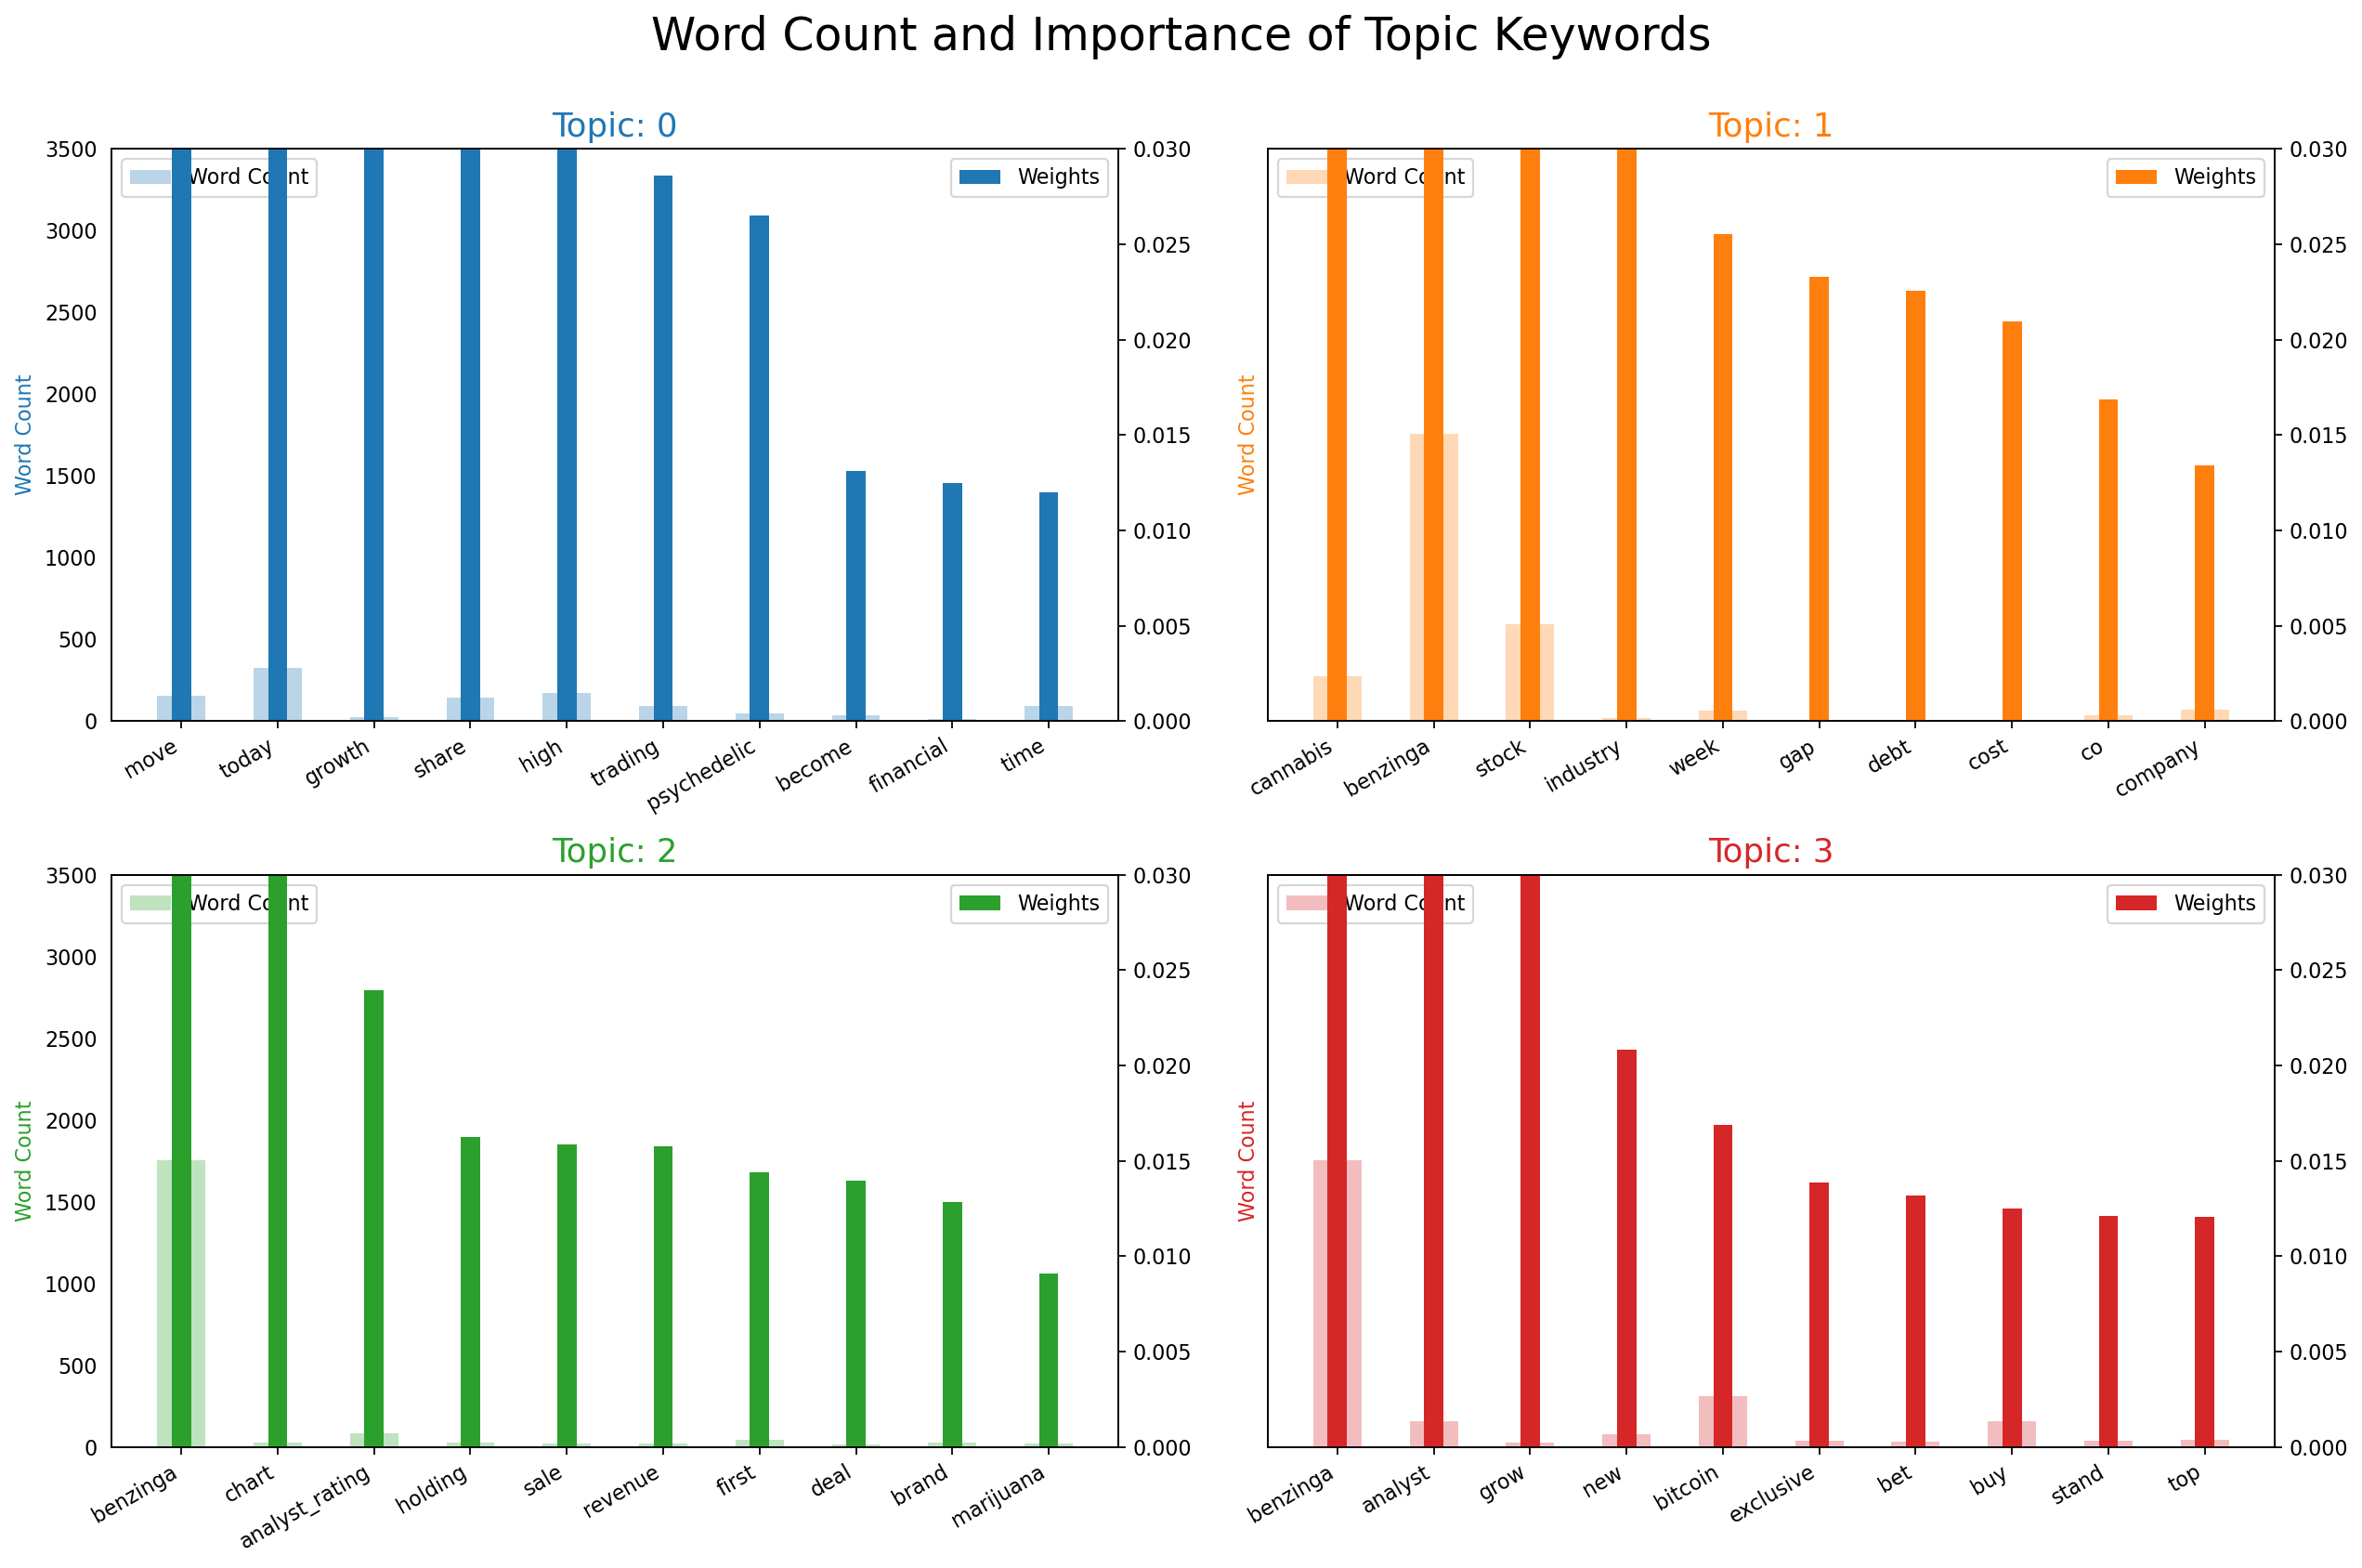

In [177]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### 7. Key Takeaway and Business Insights

 The primary function here would be to focus on the news articles itself and generate "hot" topics that the users are interested in. Considering we would like to maximise the time users spend on the platform, personalised news recos would induce the users to explore more topics related to their interest. 

Activities such as News article clustering, effective content evaluation metrics based on user feedback and clickstream analysis and tracing the impact of news articles on stock prices in general could be used. Additionally because users consume data from multiple news sources across the web, figuring how comprehensive our articles are when compared to the same topics on the web, would give more insight on the areas we need to improve in. 

### 8. Future work. 



With more time and data:



1) User Data, Because the current data set only has Author and Ticker aggregated data, incorporating user and session data would be key

2) Module 4; would be to Assign the Authors and tickers their dominant topics, so we know which authors write about topics exactly and can build a system to push relevant author feeds to relevant users

3) Time Series prediction to predict future page views given author and time

4) Text Summarization (like inshorts – a news app which gives condensed news analysis on topics) based on interests, so instead of browsing through multiple news articles in detail, a bullet point summary of "interesting" topics to the user could be generated